<a href="https://colab.research.google.com/github/LCCAbraham/ICD-2023/blob/main/6%20-%20Clasificaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Abraham Cisneros Valladolid

#Práctica 4: Tarea de clasificación
## Esta práctica tiene como objetivo probar varios algoritmos de inferencia sobre los mismos datos y determinar cual es mejor segun sus:


1.   *Accuracy*
2.   Sensibilidad
3.   Especifidad

##Al final se comparará el mejor algoritmo contra si mismo pero con los datos en un espacio modificado, aplicando (PCA, LDA, t-SNE, etc.)




#1 - Datos y plantamiento del problema.




Este notebook trabajará con datos relacionados al videojuego de estrategia en tiempo real multijugador llamado: "League of Legends" pues al ser un juego de estrategia se generan multiples datos al finalizar cada partida.

Pues el juego funciona tiene como premisa recolectar oro, matar al enemigo, destruir su base, conseguir mejoras, objetivos y finalmente romper la base enemiga.

Para lograr todo eso se necesitan acciones, las cuales se traducen en información que se puede recoletar por equipo, tales como: oro por minuto, asesinatos por minuto, objetivos destruidos, mejoras obtenidas, etc.

Al ser un juego multijugador se tiene un modo de juego en el cual se van clasificando a los jugadores segun su nivel de juego, por lo que puedes ir escalando entre las divisiones, entre más alto, mejores son los jugadores. Se tiene la premisa de que entre mejores son los rangos de jugadores juegan de maneras distintias, por lo que tienes que aprender nuevas cosas al querer subir de division.

Para determinar si esto tiene algo de cierto, usaremos datos de partidas de los 3 rangos más altos de League of Legends, para determinar con un modelo si dados los datos de la partida se puede determinar el rango en el que se esta jugando.



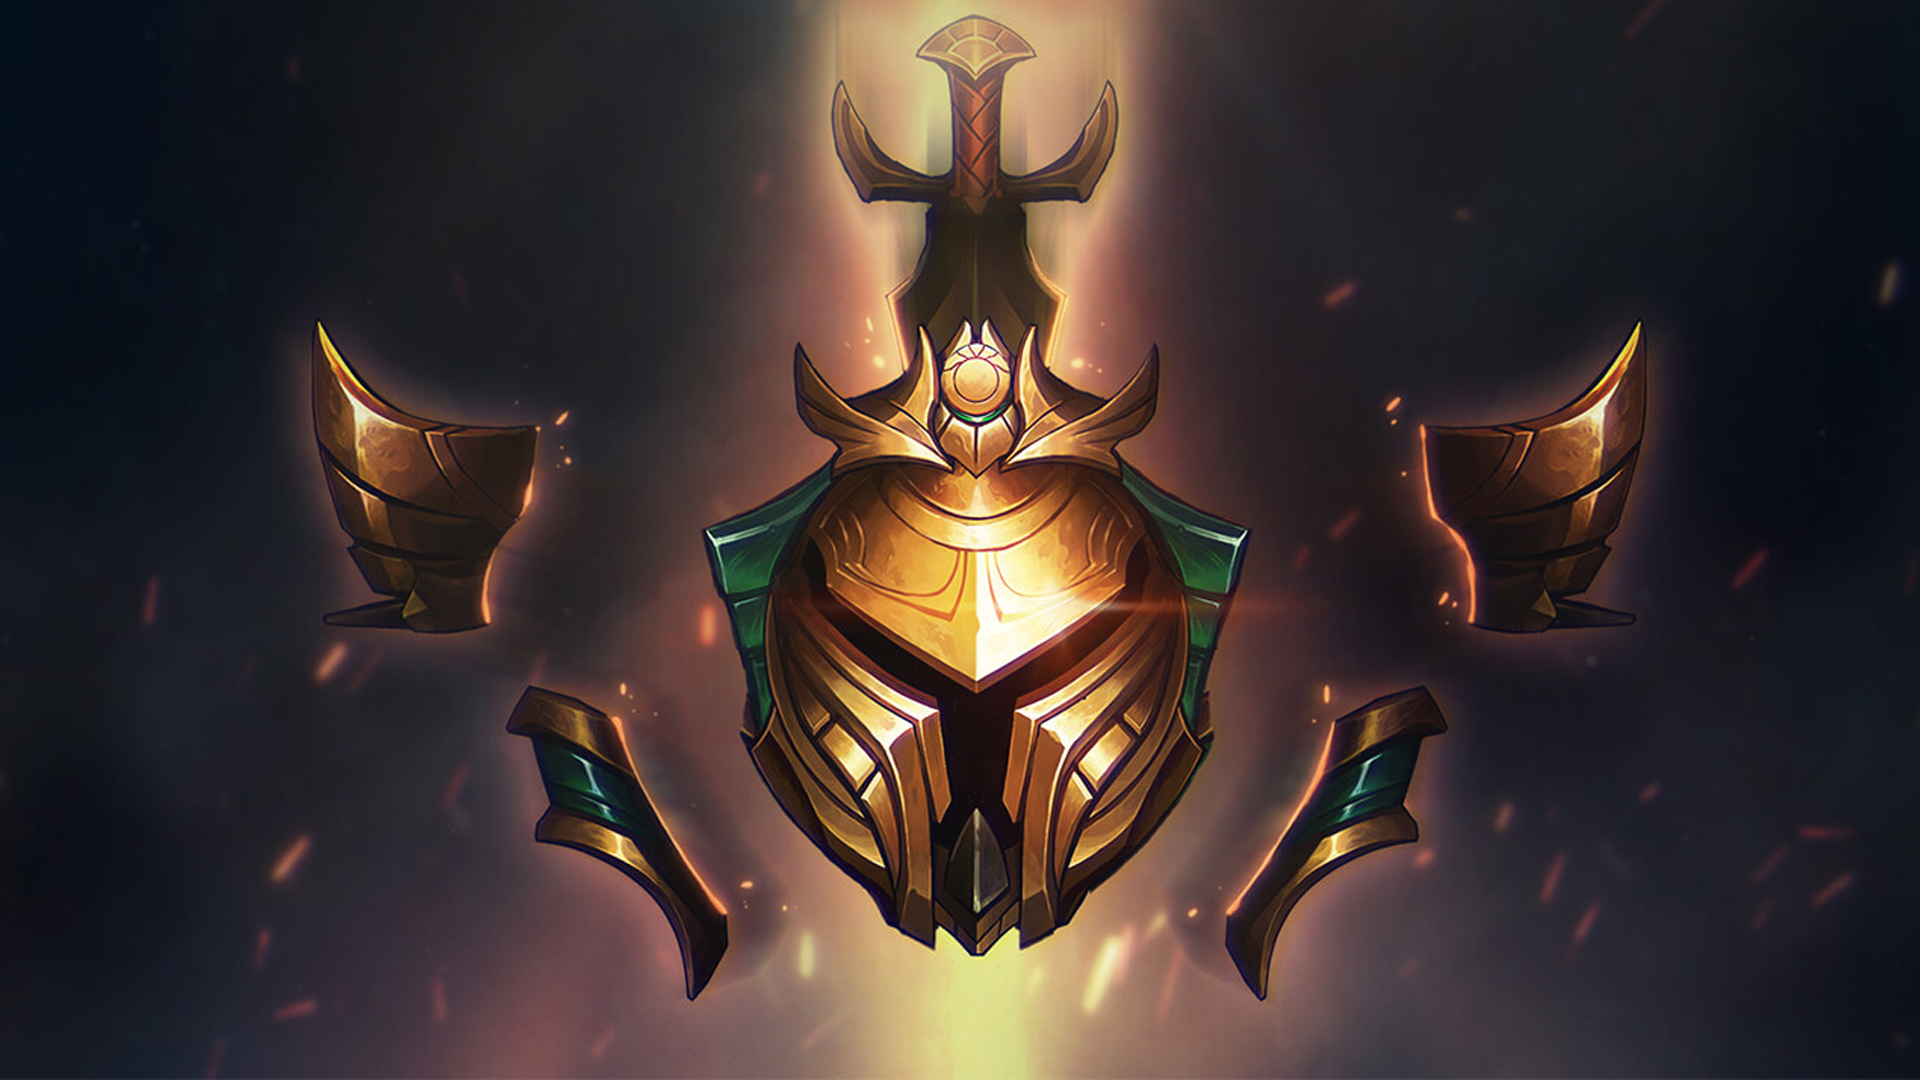

#2 - Importando datos





Los datos que tenemos son 3 CSV, uno para la division más alta, otra para la segunda división más alta y una ultima para la tercera mejor división.

In [1]:
import pandas as pd
#Divsion Master
url="https://drive.google.com/file/d/16YTqL-YP2fVxNsWYnqUKrdhRKQZasWHk/view?usp=share_link"
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df_Master = pd.read_csv(url)

#Divsion Gran Master
url="https://drive.google.com/file/d/1-RvxKVFdHYRIwlv_0j51lUt3xuR0cQO7/view?usp=share_link"
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df_GranMaster = pd.read_csv(url)

#Division Retador
url="https://drive.google.com/file/d/180E0tzRcNkzlEpqu02MS3iiUeyPemied/view?usp=share_link"
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df_Retador = pd.read_csv(url)

#3 - Preprocesamiento

Para hacer más sencillo nuestro analisis, uniremos los 3 datasets en uno solo, sin embargo, antes de hacerlo, los etiquetaremos con la division de la partida para que sea sencillo diferenciarlos.

In [2]:
#Agregamos el atributo "rank" a cada conjunto de datos.
df_Master["rank"] = "master"
df_GranMaster["rank"] = "granmaster"
df_Retador["rank"] = "retador"

df = pd.concat([df_Master, df_GranMaster, df_Retador])
df.head()

,gameId,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,...,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt,rank
0,4227123625,1429,0,1,1,0,0,0,0,0,...,53831,41991,609,64,12.8,127,4,12916,26338,master
1,4219545724,1313,0,0,1,0,0,0,0,0,...,52924,39672,510,63,12.6,133,4,12252,29828,master
2,4219463634,1660,1,0,0,1,1,1,1,1,...,61745,46516,630,65,13.0,153,2,17005,37066,master
3,4205778093,984,1,1,1,0,1,0,2,0,...,25007,21444,304,41,8.2,51,1,10499,3085,master
4,4201063474,1437,0,1,1,0,1,0,2,0,...,71794,45798,565,68,13.6,150,7,47523,47150,master


In [3]:
df.shape

(199925, 51)

Al final, nuestro DataFrame tiene 51 atributos y casi 200,000 instancias. Veamos si tenemos valores faltantes.

In [4]:
df.isnull().sum()

gameId                     0
gameDuraton                0
blueWins                   0
blueFirstBlood             0
blueFirstTower             0
blueFirstBaron             0
blueFirstDragon            0
blueFirstInhibitor         0
blueDragonKills            0
blueBaronKills             0
blueTowerKills             0
blueInhibitorKills         0
blueWardPlaced             0
blueWardkills              0
blueKills                  0
blueDeath                  0
blueAssist                 0
blueChampionDamageDealt    0
blueTotalGold              0
blueTotalMinionKills       0
blueTotalLevel             0
blueAvgLevel               0
blueJungleMinionKills      0
blueKillingSpree           0
blueTotalHeal              0
blueObjectDamageDealt      0
redWins                    0
redFirstBlood              0
redFirstTower              0
redFirstBaron              0
redFirstDragon             0
redFirstInhibitor          0
redDragonKills             0
redBaronKills              0
redTowerKills 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199925 entries, 0 to 26903
Data columns (total 51 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   gameId                   199925 non-null  int64  
 1   gameDuraton              199925 non-null  int64  
 2   blueWins                 199925 non-null  int64  
 3   blueFirstBlood           199925 non-null  int64  
 4   blueFirstTower           199925 non-null  int64  
 5   blueFirstBaron           199925 non-null  int64  
 6   blueFirstDragon          199925 non-null  int64  
 7   blueFirstInhibitor       199925 non-null  int64  
 8   blueDragonKills          199925 non-null  int64  
 9   blueBaronKills           199925 non-null  int64  
 10  blueTowerKills           199925 non-null  int64  
 11  blueInhibitorKills       199925 non-null  int64  
 12  blueWardPlaced           199925 non-null  int64  
 13  blueWardkills            199925 non-null  int64  
 14  blueK

Al parecer todos las instancias estan completas y sin datos faltantes, por lo que podemos iniciar la exploración de los datos.

#4 - Exploración de datos

##Distribución de los equipos

Veamos la distribución de las clases en nuestro conjunto de datos.

Algo importante a tener en cuenta, es que los atributos estan dividos por equipo, en este caso equipo "blue" y "red". Entonces tenemos los mismos atributos pero por equipo.

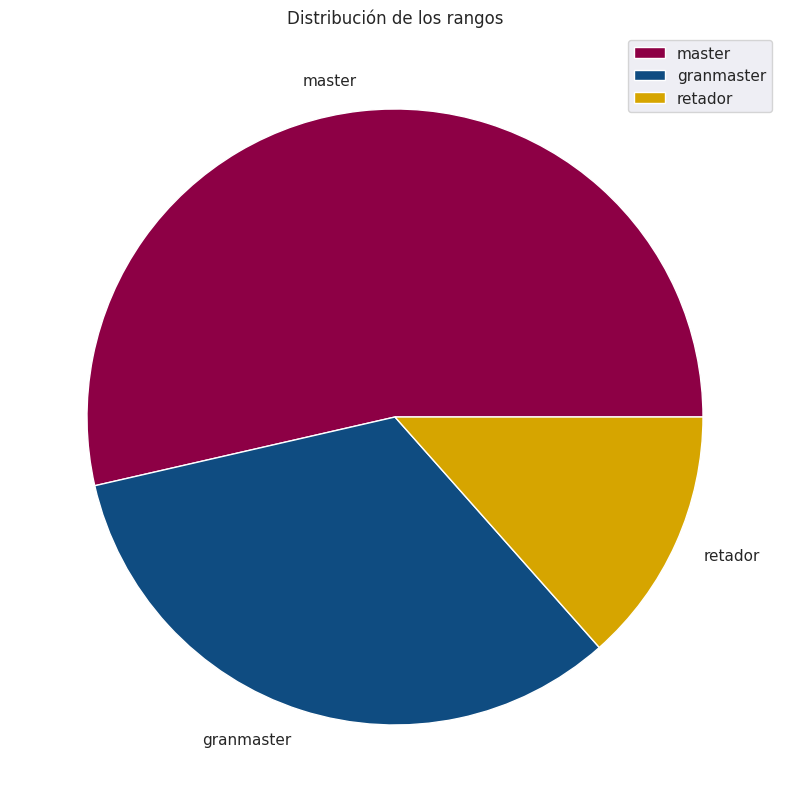

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

#Establecemos un tema
sns.set(style="darkgrid")
palette = ["#8d0045", "#0f4c81", "#d6a500" ]
sns.set_palette(palette)

#Establecemos el tamaño de los datos
plt.figure(figsize=(10, 10))

#Contamos los valores
counts = df["rank"].value_counts()

#Generamos el gráfico
plt.pie(counts, labels = df["rank"].unique())

#Establecemos etiquetas y leyendas
plt.title("Distribución de los rangos")
plt.legend()

#Mostramos el grafico
plt.show()

Podemos observar que se tiene una distribución un tanto desbalanceada, por lo que se harán pruebas con K-fold y K-fold estratificado.

El desbalance tiene todo el sentido en el contexto del juego, pues entre más alto el rango hay un menor porcentaje de jugadores, por ende una menor cantidad de partidas por rango.

## Distribución de victorias entre rangos

También es importante ver como es la distribución de las victorias según el equipo, ya sea "blue" o "red".

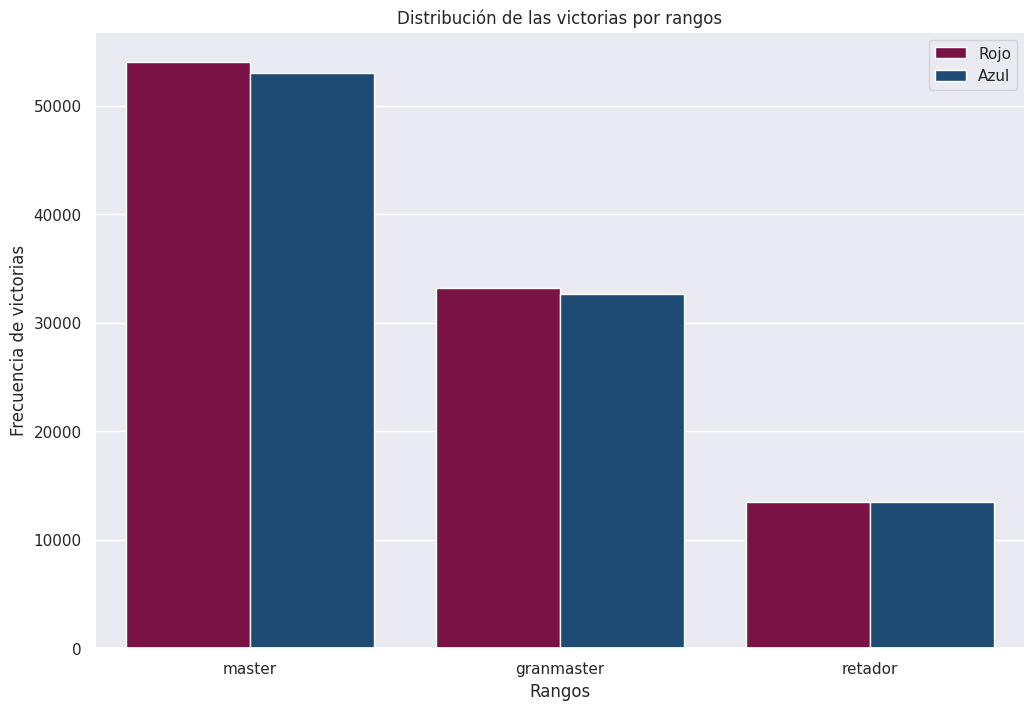

In [7]:
#Tamaño del gráfico
plt.figure(figsize=(12, 8))

#Generamos el gráfico
sns.countplot(data=df, x = "rank", hue = "blueWins")

#Establecemos etiquetas y leyendas
plt.title("Distribución de las victorias por rangos")
plt.legend(["Rojo", "Azul"])
plt.xlabel("Rangos")
plt.ylabel("Frecuencia de victorias")

#Mostramos el grafico
plt.show()

Afortunadamente tenemos casí la misma distribución en victorias y derrotas entre ambos lados.

El lado del equipo no debe de significar ninguna ventaja, pues el juego tiene el mapa en modo espejo para cada equipo, eso quiere decir que se repite el mapa para ambos equipos solo que invertido, tal como podemos ver en la imagen:

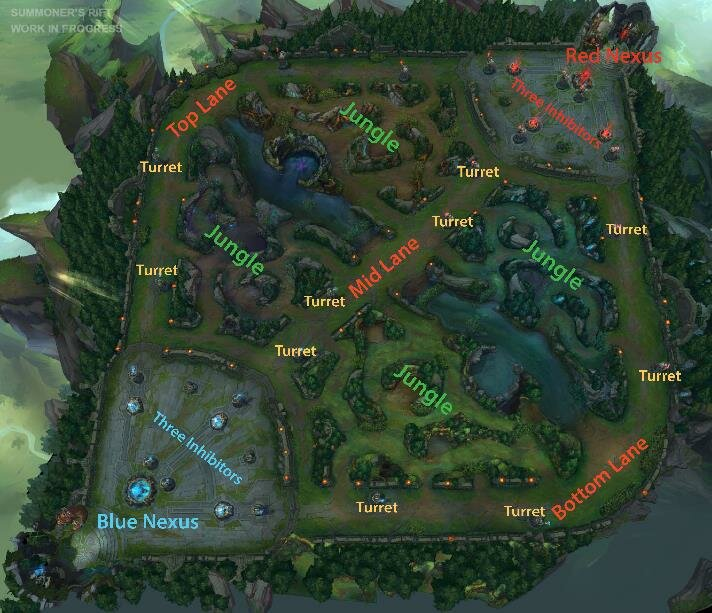

##Importancia de la primera sangre

Veamos el impacto que tiene tener la primera sangre para ganar, según el lado.

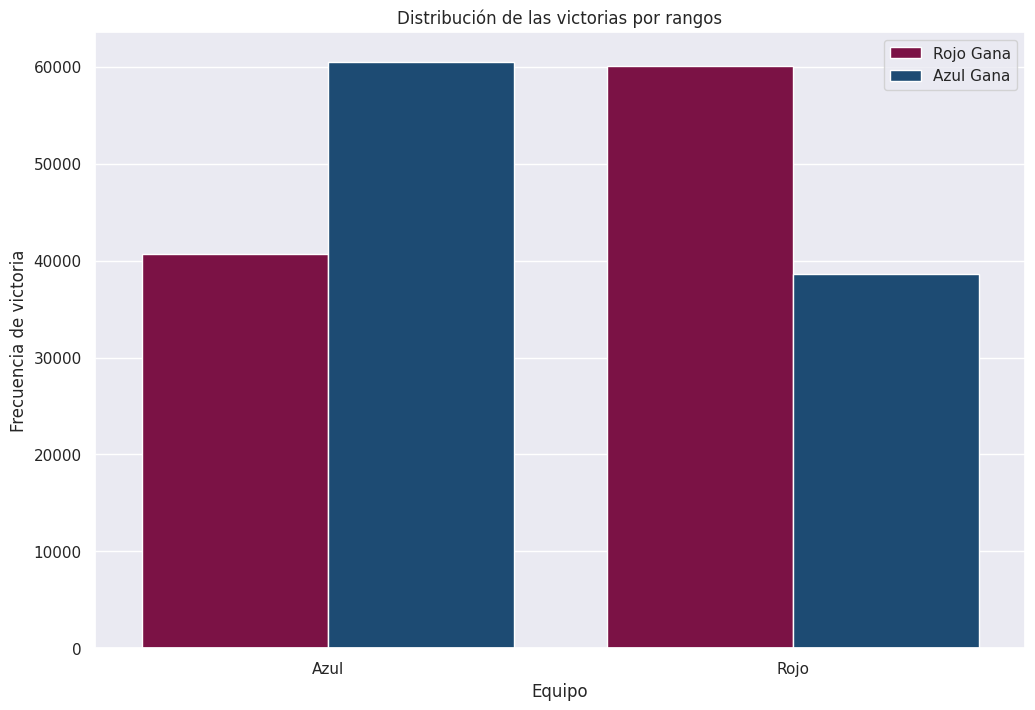

In [8]:
#Tamaño del gráfico
plt.figure(figsize=(12,8))

#Generamos el gráfico
df["whoFirstBlood"] = df.blueFirstBlood.map({0: "Rojo", 1: "Azul"})
sns.countplot(data=df, x = "whoFirstBlood", hue = "blueWins")
#Establecemos etiquetas y leyendas
plt.title("Distribución de las victorias por rangos")
plt.legend(["Rojo Gana", "Azul Gana"])
plt.xlabel("Equipo")
plt.ylabel("Frecuencia de victoria")

#Mostramos el grafico
plt.show()


Lo que podemos ver es que si el equipo obtiene la primera baja, tiene muchas probabilidades de ganar la partida.

En el contexto del videojuego significa tener la ventaja desde un principio, lo cual puede desencadenar en un efecto bola de nieve donde el equipo con ventaja solo consigue más ventaja que al final se refleja en una victoria, preceisamente es lo que nos dice la gráfica.

##Importancia de los dragones

Ahora, veamos la importancia que tienen los dragones para conseguir una victoria.

Los dragones son objetivos neutros dentro del juego que proporcionan ventajas durante la partida para el equipo que lo llega capturar, por lo que es de esperar que tengan un gran impacto para conseguir una victoria.

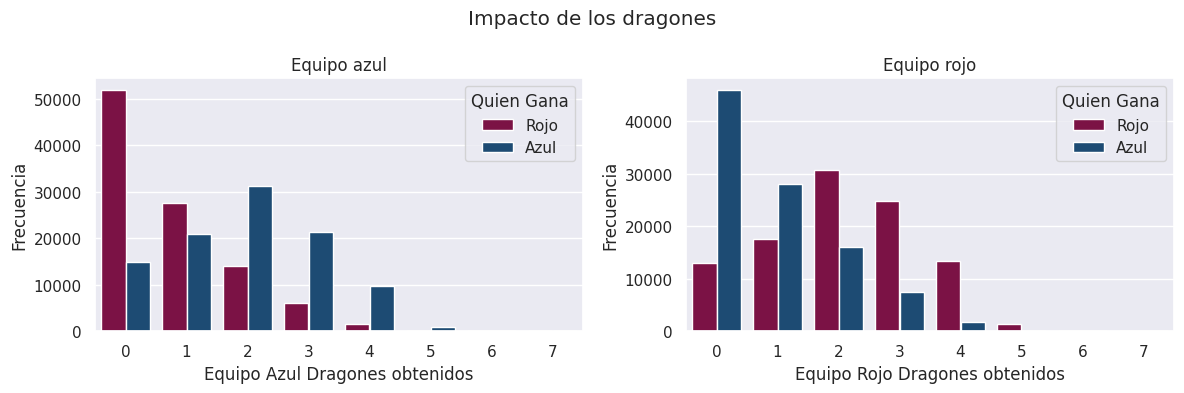

In [9]:
#Establecemos la figura
fig, ax = plt.subplots(ncols = 2, figsize=(12,4))

#Determinar quien gano
df["Quien Gana"] = df.blueWins.map({0: "Rojo", 1: "Azul"})

#Grafico
sns.countplot(data=df, x="blueDragonKills", hue = "Quien Gana", ax=ax[0])

#Grafico
sns.countplot(data=df, x="redDragonKills", hue = "Quien Gana", ax=ax[1])

#Subtitulo
plt.suptitle("Impacto de los dragones")

#Establecemos leyendas
ax[0].set_title("Equipo azul")
ax[0].set_xlabel("Equipo Azul Dragones obtenidos")
ax[0].set_ylabel("Frecuencia")

ax[1].set_title("Equipo rojo")
ax[1].set_xlabel("Equipo Rojo Dragones obtenidos")
ax[1].set_ylabel("Frecuencia")

#Mostramos el grafico
plt.tight_layout()

Algo que podemos observar de las graficas es la importancia de los dragones en el juego, pues cuando el equipo no posee ningun dragon tienen 5 veces más probabilidades de perder.

Al mismo tiempo conforme al tiempo al tener más dragones se van obteniendo las probabilidades de ganar suben.

## Importancia de los subditos

Los subditos son más importantes que los dragones, pues gracias a ellos consiguen experencia (lo cual hace mas fuerte a los personajes) y oro (lo cual permite comprar mejoras para el personaje) por lo que se consideran a los subditos como la base para ganar, aunque, no siempre es el caso.

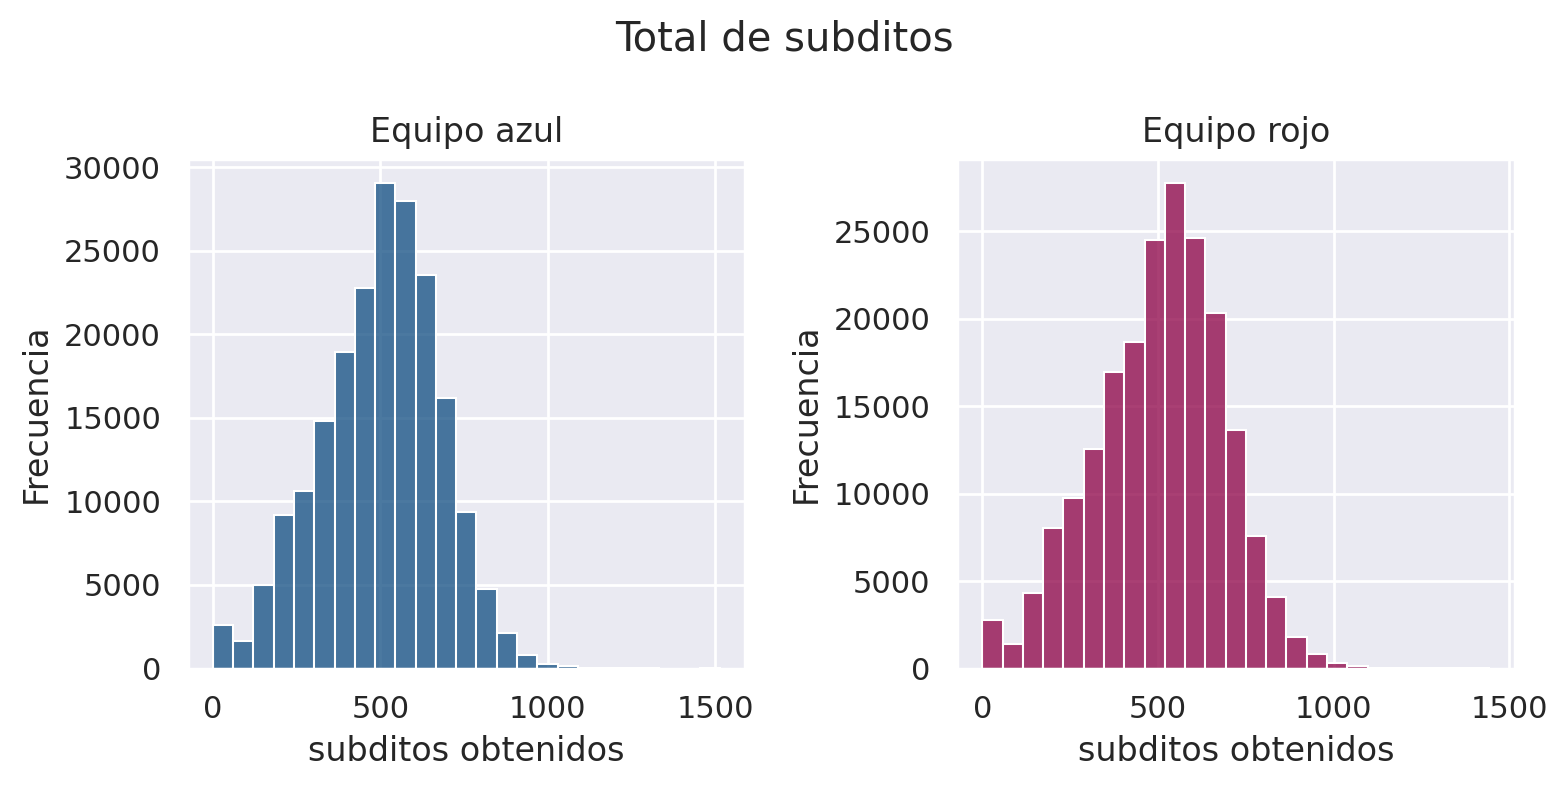

In [10]:
#Establecemos la figura\
fig, ax = plt.subplots(ncols=2, figsize=(8,4), dpi=200)

#Grafico
sns.histplot(data=df, x="blueTotalMinionKills", bins=25, ax=ax[0],  color="#0f4c81" )
sns.histplot(data=df, x="redTotalMinionKills", bins=25, ax=ax[1])

#Subtitulo
plt.suptitle("Total de subditos")

#Establecemos leyendas
ax[0].set_title("Equipo azul")
ax[0].set_xlabel("subditos obtenidos")
ax[0].set_ylabel("Frecuencia")


ax[1].set_title("Equipo rojo")
ax[1].set_xlabel("subditos obtenidos")
ax[1].set_ylabel("Frecuencia")

#Mostramos grafico
plt.tight_layout()

Algo interesante que se puede obserbar es una distrución normal entre la cantidad de subditos obtenidos respecto a su frecuencia, pues la media se encuentra entre los 500, sin embargo, esto es de esperarse ya que ambos equipos se encuentran en codiciones similares.

Esto nos deja la duda, ¿Como se ve esto pero respecto a los rangos?

##Diferencia de subditos entre rangos

Veamos las distribucion de los subditos obtenidos por cada rango, recordemos que para llegar a ser el mejor rango se tiene que jugar a un nivel casi perfecto, por lo que necesitan obtener más oro y experencia de los minions.

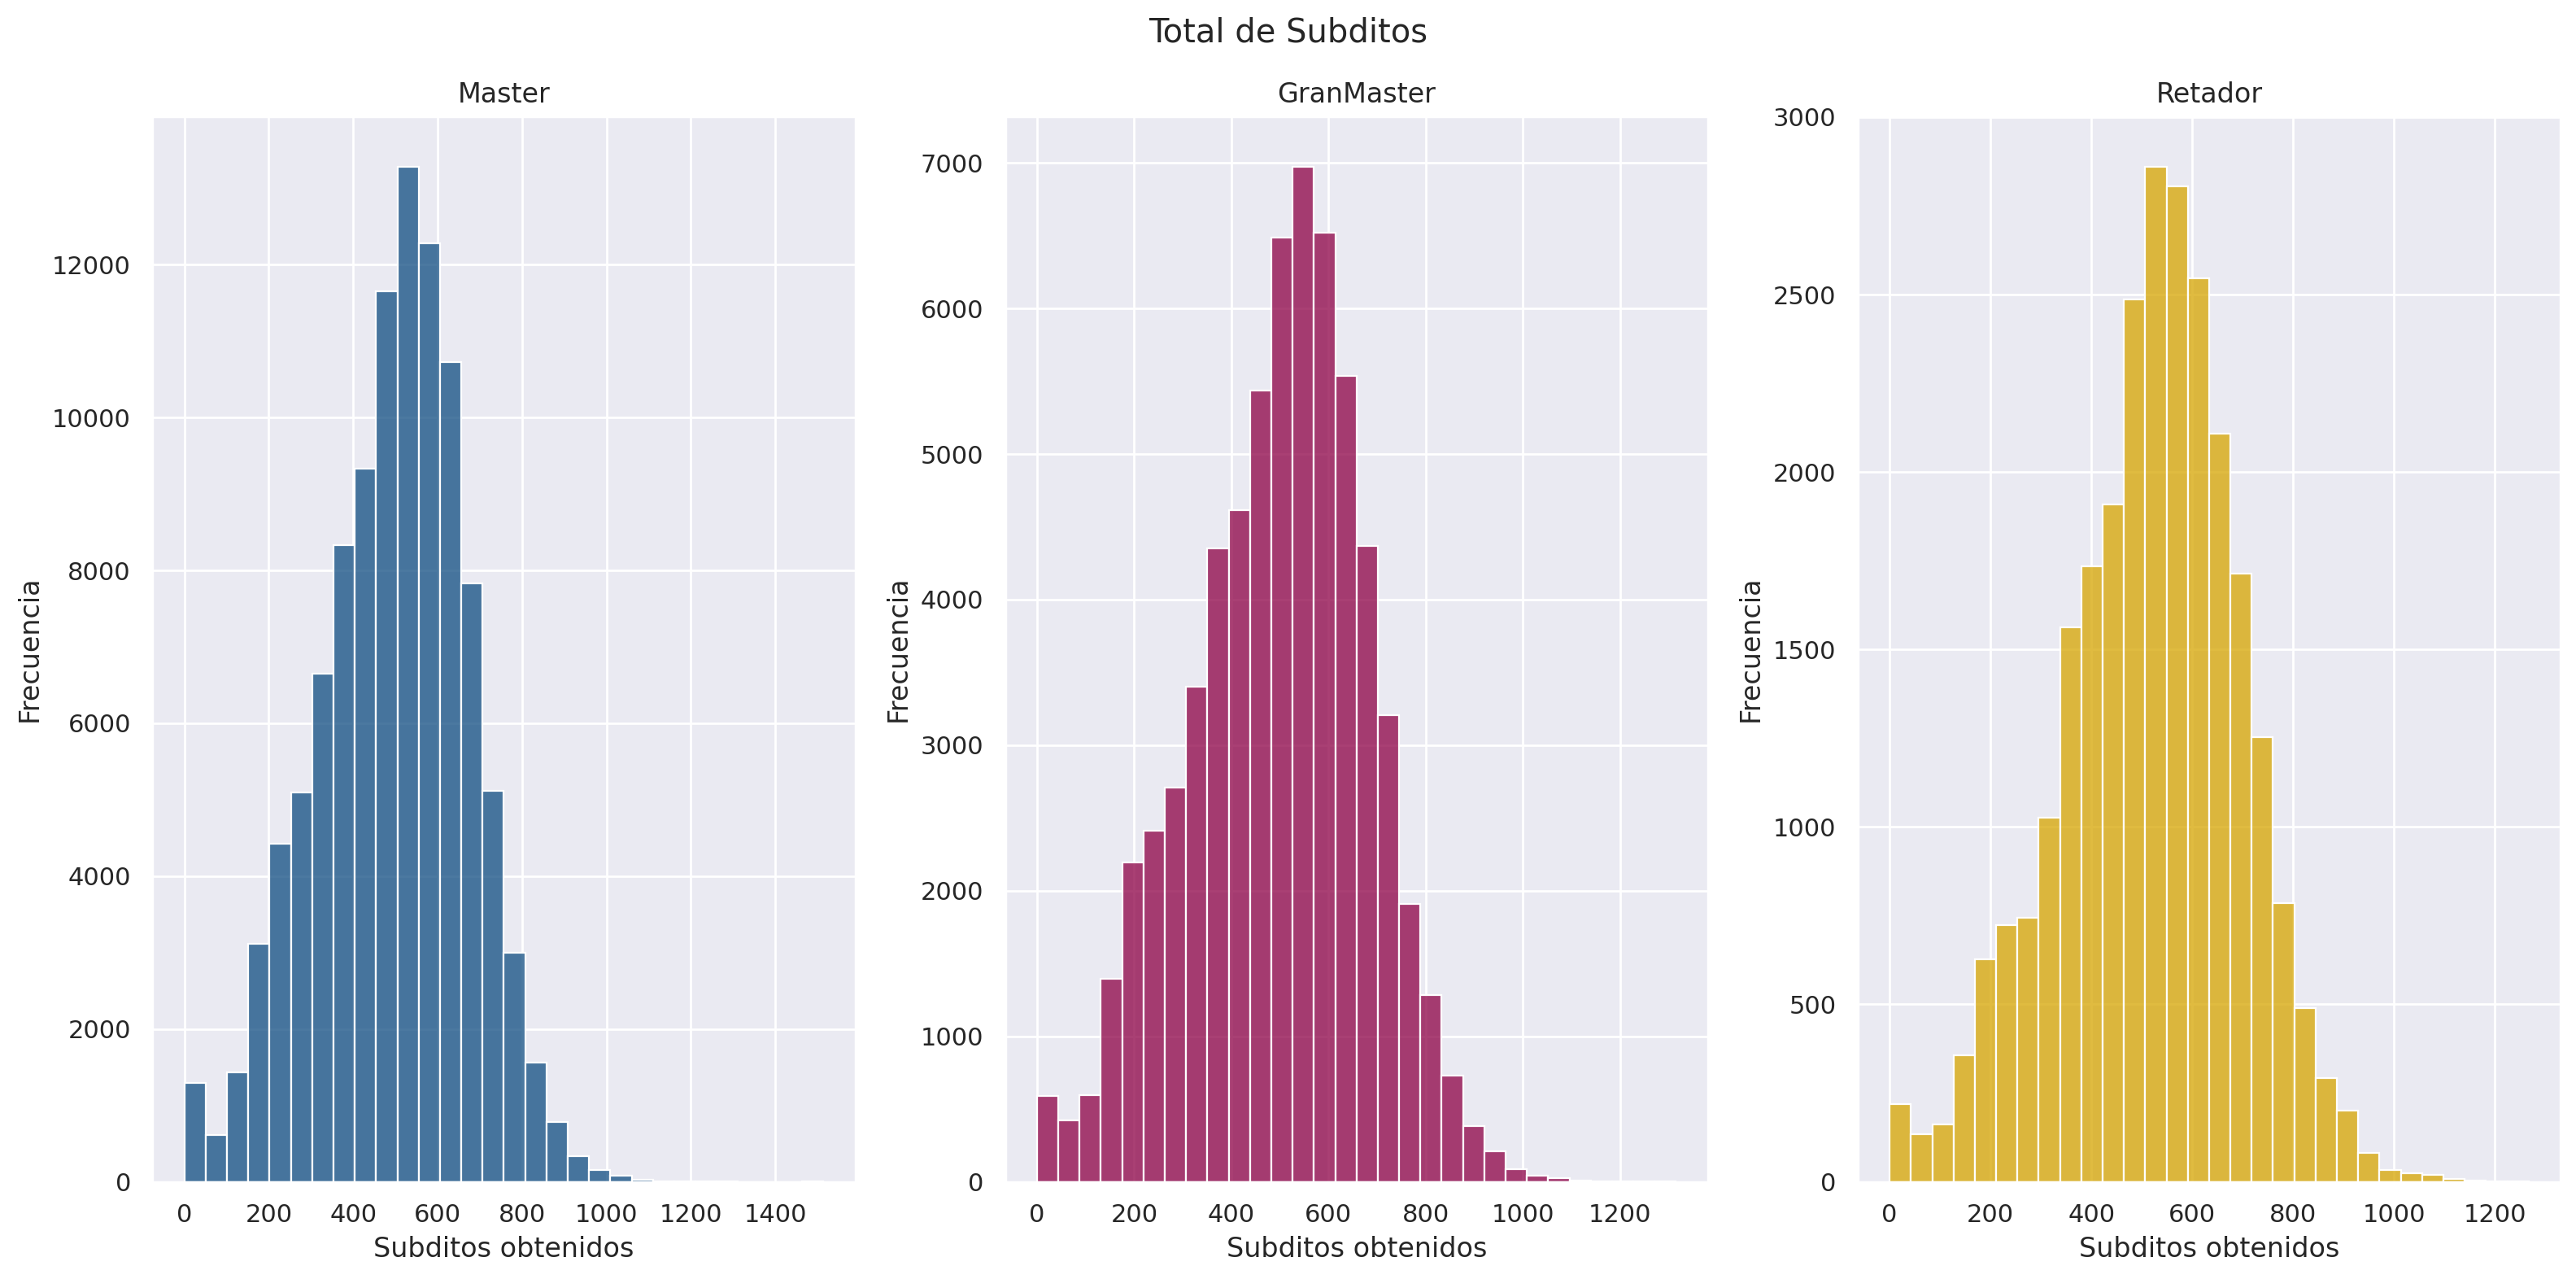

In [11]:
#Establecemos la figura\
fig, ax = plt.subplots(ncols=3, figsize=(16,8), dpi=200)

#Grafico
sns.histplot(data=df_Master, x="blueTotalMinionKills", bins=30, ax=ax[0],  color="#0f4c81" )
sns.histplot(data=df_GranMaster, x="blueTotalMinionKills", bins=30, ax=ax[1])
sns.histplot(data=df_Retador, x="blueTotalMinionKills", bins=30, ax=ax[2], color="#d6a500")

#Subtitulo
plt.suptitle("Total de Subditos")

#Establecemos leyendas
ax[0].set_title("Master")
ax[0].set_xlabel("Subditos obtenidos")
ax[0].set_ylabel("Frecuencia")


ax[1].set_title("GranMaster")
ax[1].set_xlabel("Subditos obtenidos")
ax[1].set_ylabel("Frecuencia")

ax[2].set_title("Retador")
ax[2].set_xlabel("Subditos obtenidos")
ax[2].set_ylabel("Frecuencia")

#Mostramos grafico
plt.tight_layout()

Lo que podemos observar es que la distribucion de los subditos obtenidos respecto a su frecuencia tiene una distribución como la campana de Gauss o normal, sin embargo, la media se va arrastrando hacia la derecha respecto a cada rango, indicando que por media entre más alto el rango más cantidad de subditos obtienen, reafirmando la premisa de que al estar en rangos altos estos juegan mejor.

Al mismo tiempo, ver estas diferencias nos ayuda a considerar el problema de usar un algoritmo de inferencia para esta tarea, pues nuestro objetivo será clasificar el rango de las partidas segun sus datos.

## Importancia de la experiencia entre rangos

La experencia se obtiene con subditos y dragones, incluso con asesinatos al equipo enemigo respecto al tiempo.

Es importante tener en cuenta que entre más alto sea el rango las partidas suelen durar más por el estilo de juego tan perfeccionado que buscan, lo que se refleja en mayores niveles promedios por el equipo.

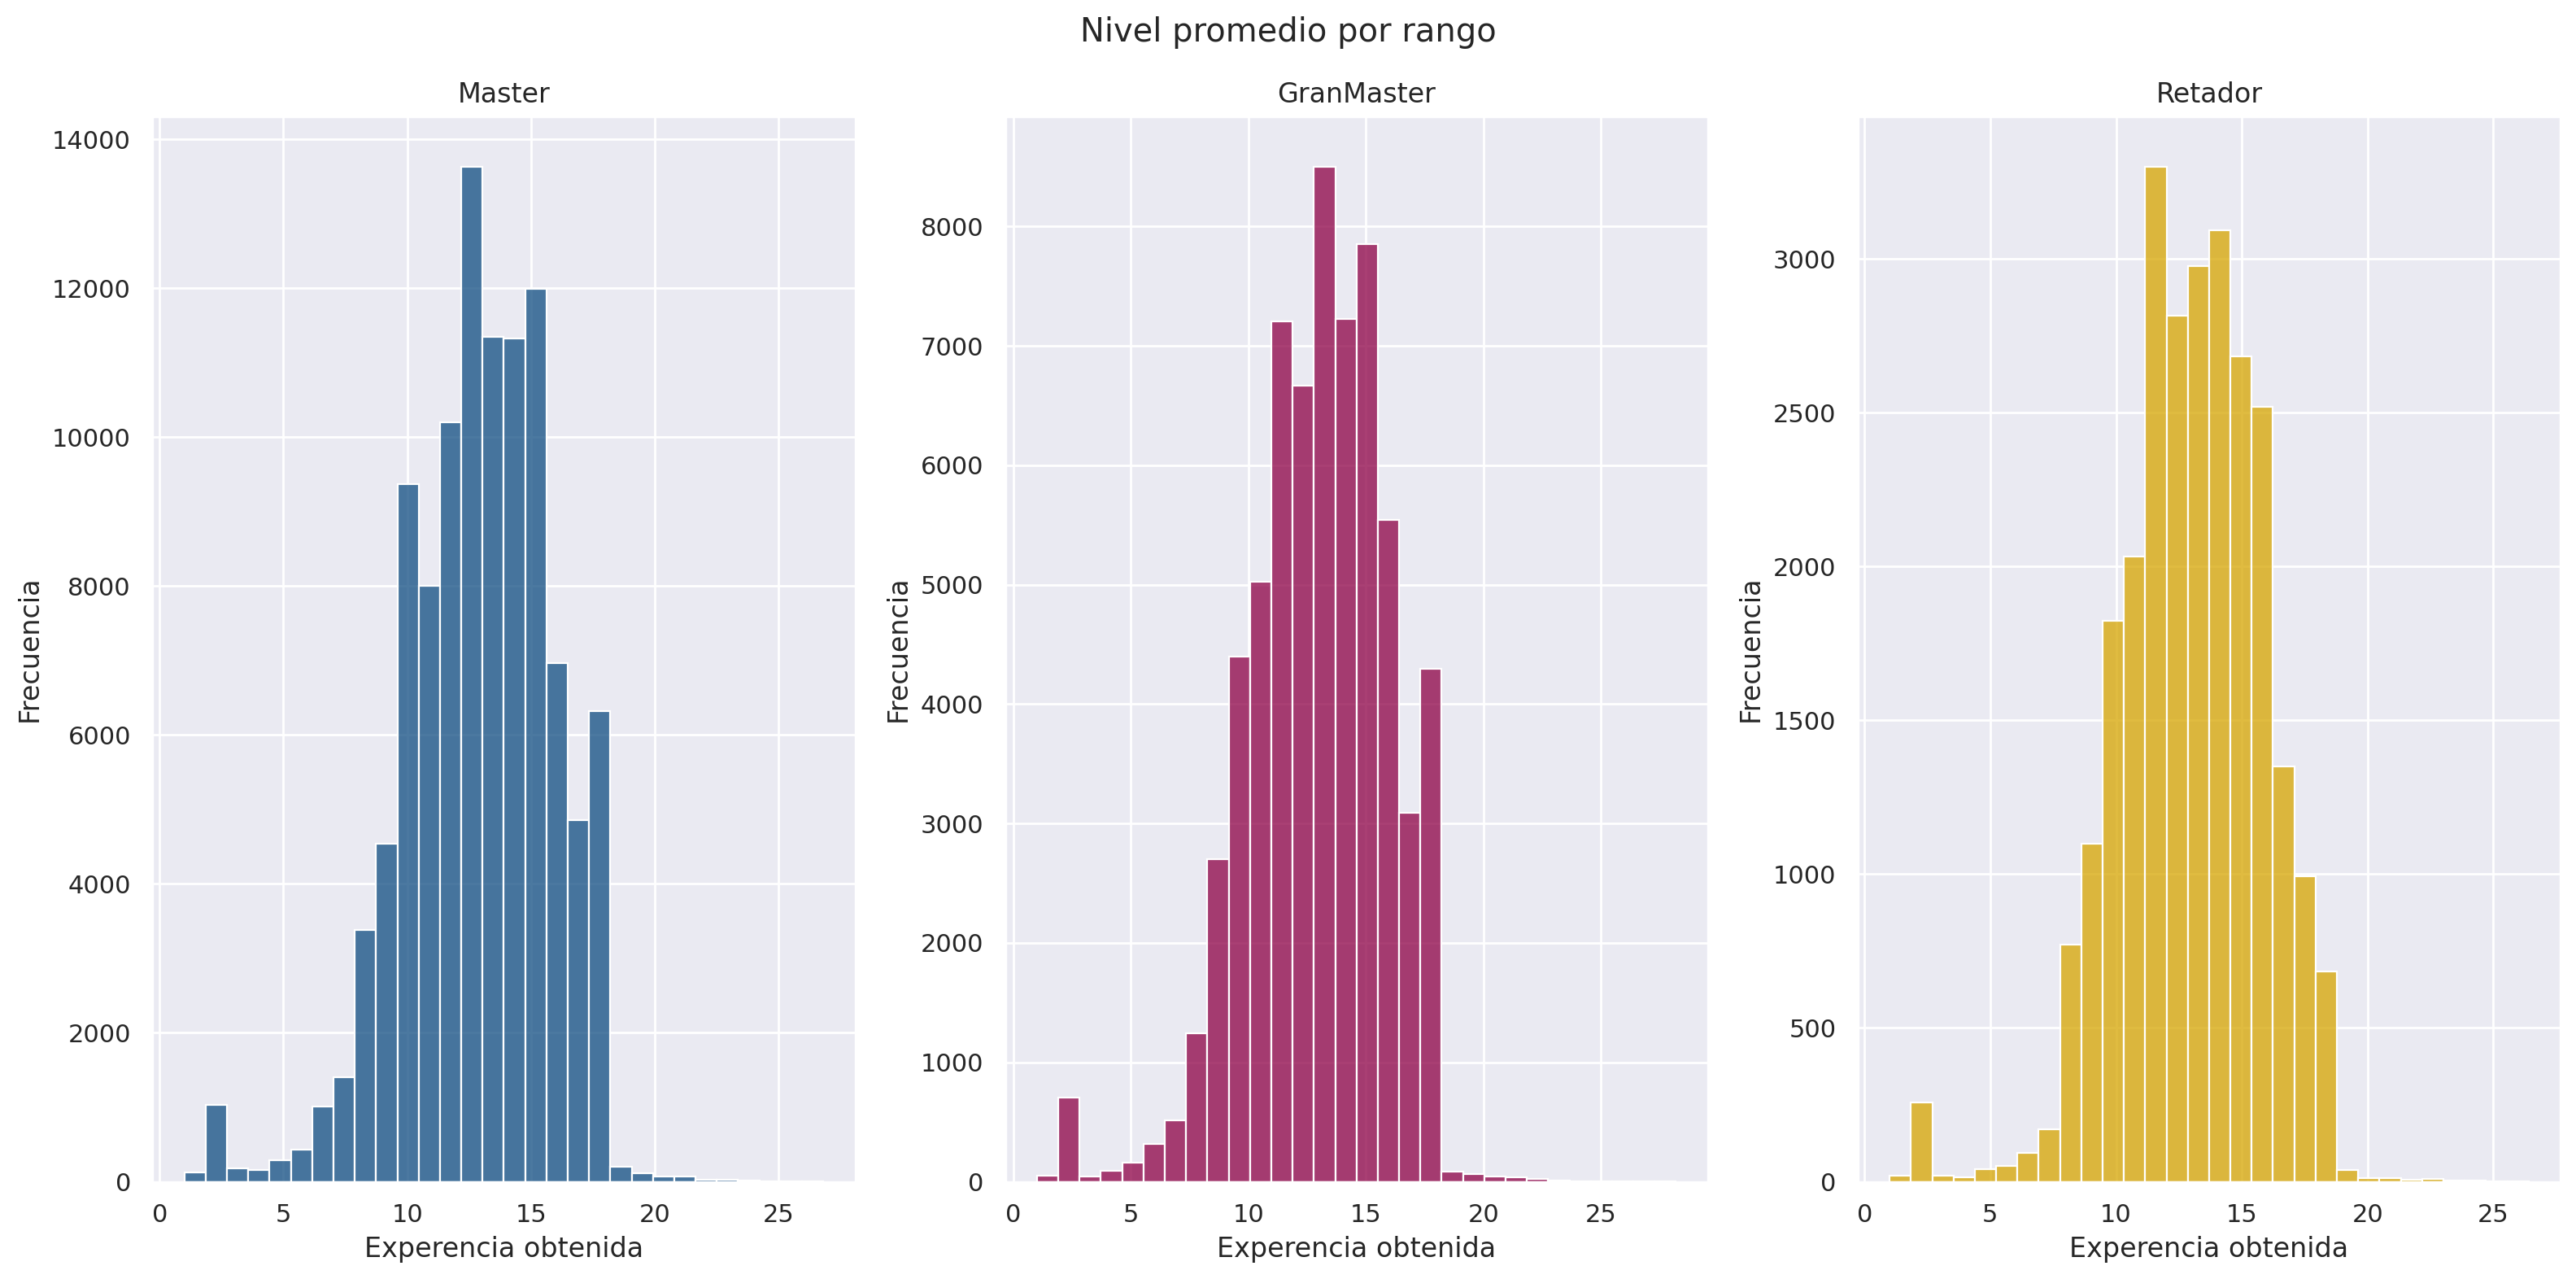

In [12]:
#Establecemos la figura\
fig, ax = plt.subplots(ncols=3, figsize=(16,8), dpi=200)

#Grafico
sns.histplot(data=df_Master, x="blueAvgLevel", bins=30, ax=ax[0],  color="#0f4c81" )
sns.histplot(data=df_GranMaster, x="blueAvgLevel", bins=30, ax=ax[1])
sns.histplot(data=df_Retador, x="blueAvgLevel", bins=30, ax=ax[2], color="#d6a500")

#Subtitulo
plt.suptitle("Nivel promedio por rango")

#Establecemos leyendas
ax[0].set_title("Master")
ax[0].set_xlabel("Experencia obtenida")
ax[0].set_ylabel("Frecuencia")


ax[1].set_title("GranMaster")
ax[1].set_xlabel("Experencia obtenida")
ax[1].set_ylabel("Frecuencia")

ax[2].set_title("Retador")
ax[2].set_xlabel("Experencia obtenida")
ax[2].set_ylabel("Frecuencia")

#Mostramos grafico
plt.tight_layout()

La grafica nos corrobora que la diferencia entre master, gran master y retador es que en retador se tienen niveles más altos con mayor frecuencia, esto se complementa con la cantidad de subditos que obtienen segun los rangos, los retadores al ser mejores obteniendo subidtos que dan experencia, tendran por ende mayor nivel promedio por equipo

## Importancia en los wards

Los wards son un objeto dentro del juego que permite la creación de jugadas importantas en las peleas contra el enemigo para asegurar objetivos como el Dragon.

Veamos como esto fluctua respecto a los rangos

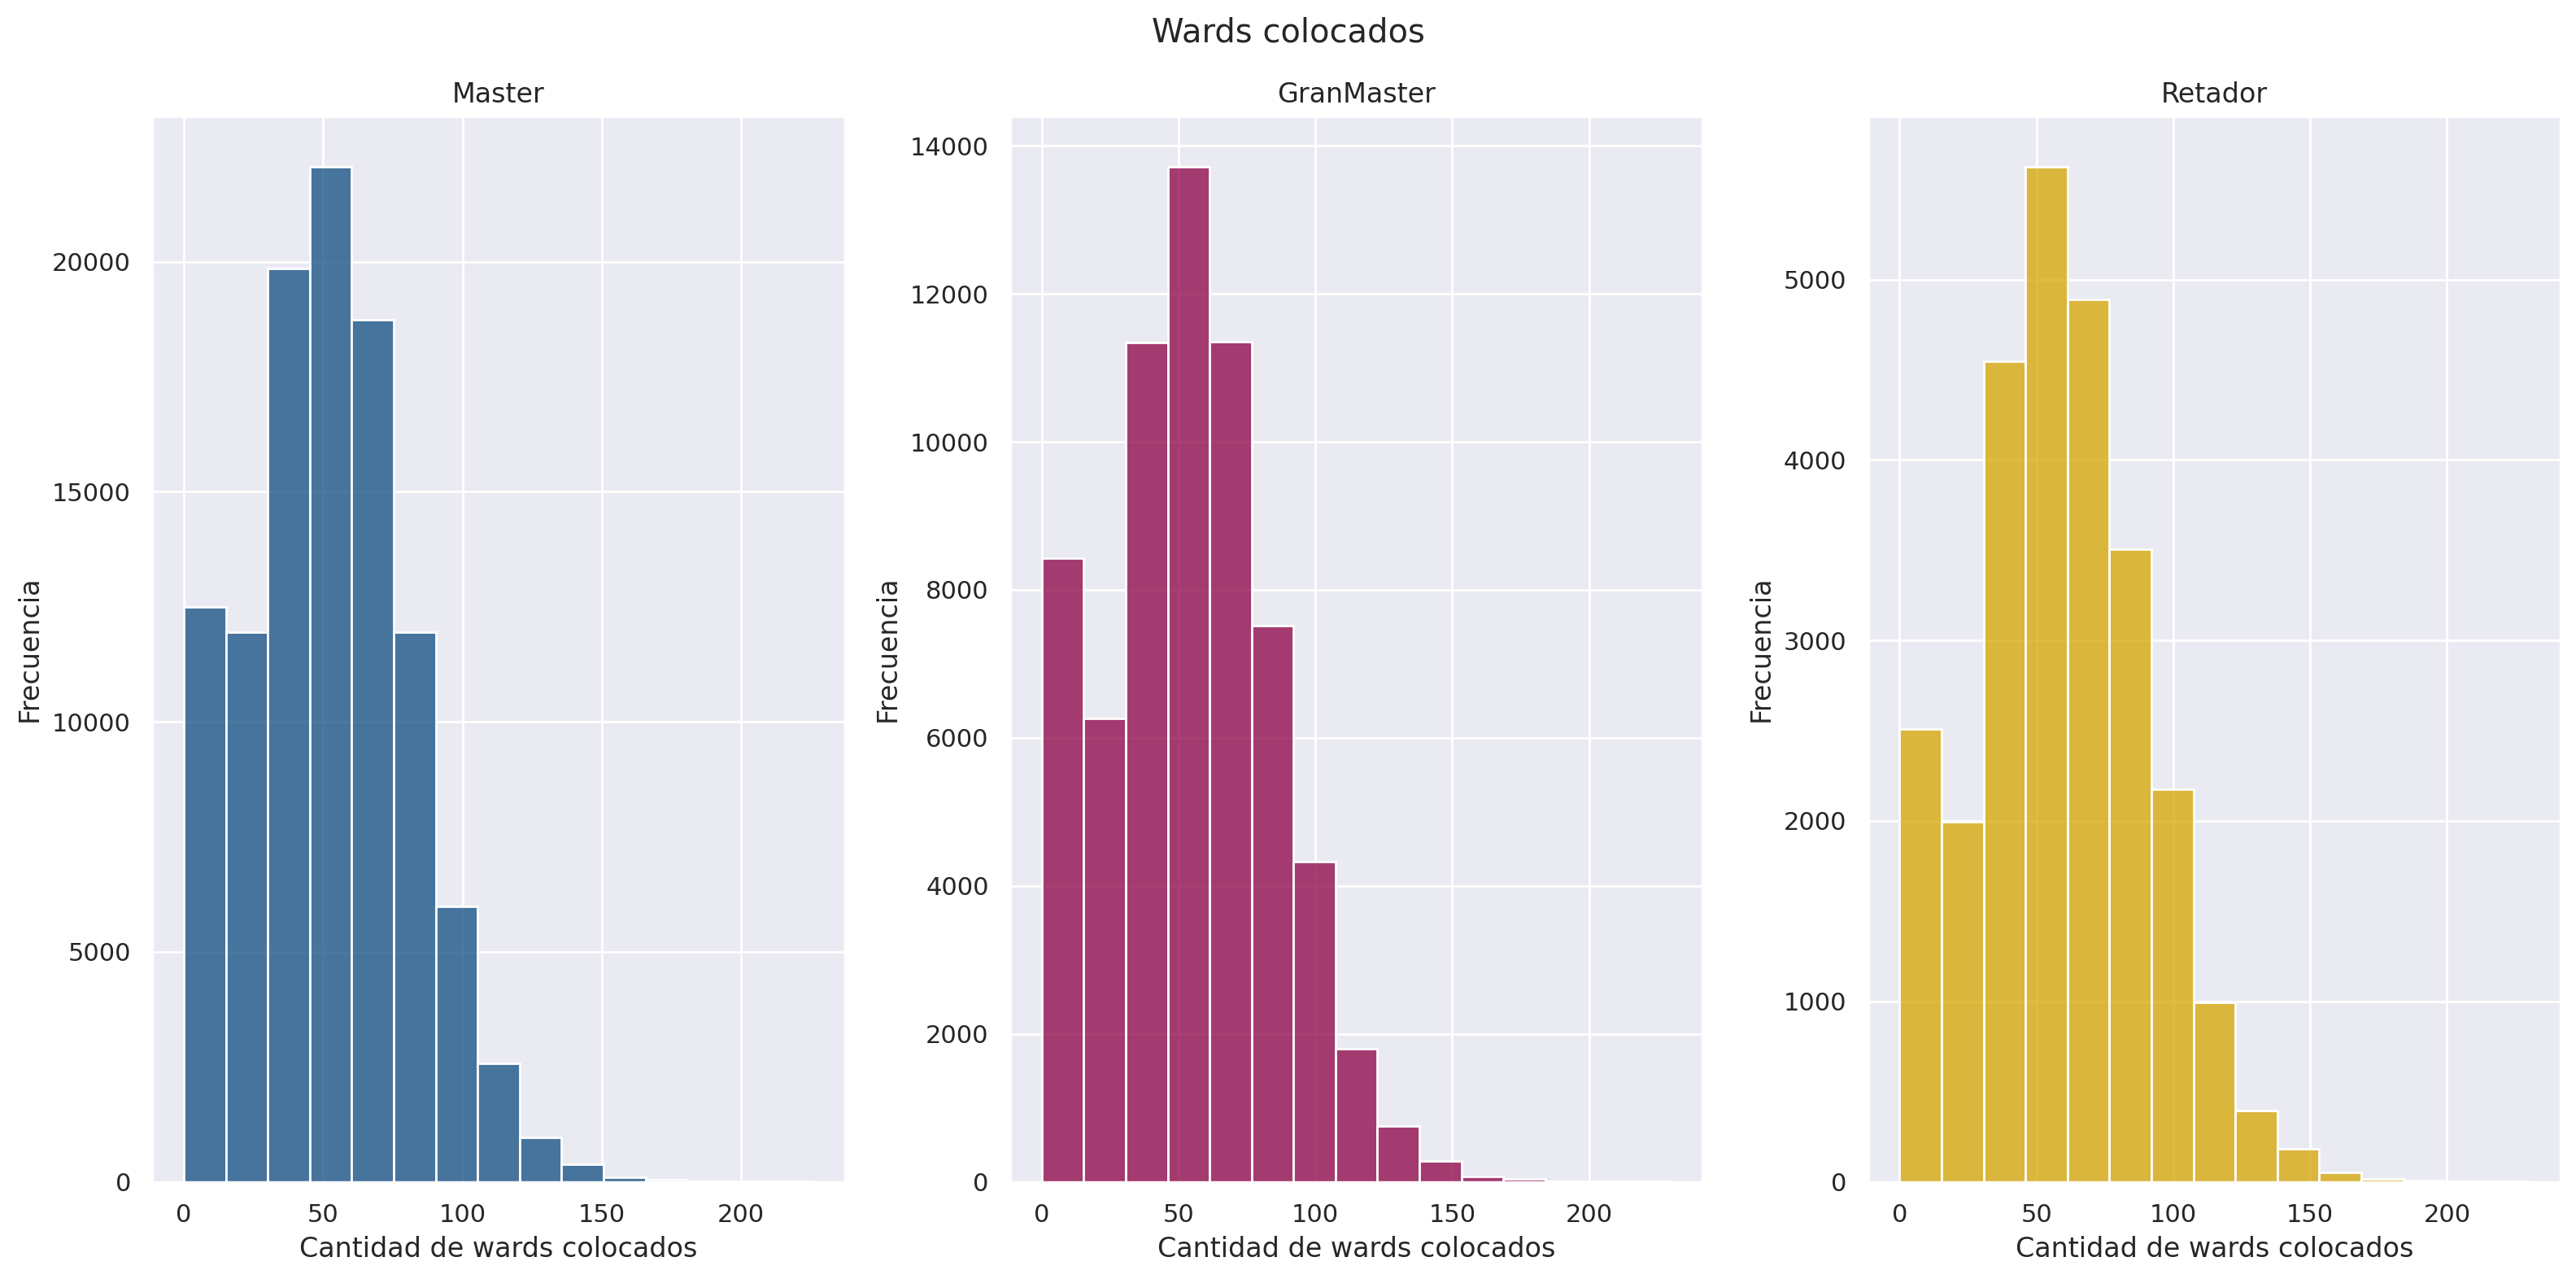

In [13]:
#Establecemos la figura\
fig, ax = plt.subplots(ncols=3, figsize=(16,8), dpi=200)

#Grafico
sns.histplot(data=df_Master, x="blueWardPlaced", bins=15, ax=ax[0],  color="#0f4c81" )
sns.histplot(data=df_GranMaster, x="blueWardPlaced", bins=15, ax=ax[1])
sns.histplot(data=df_Retador, x="blueWardPlaced", bins=15, ax=ax[2], color="#d6a500")

#Subtitulo
plt.suptitle("Wards colocados")

#Establecemos leyendas
ax[0].set_title("Master")
ax[0].set_xlabel("Cantidad de wards colocados")
ax[0].set_ylabel("Frecuencia")


ax[1].set_title("GranMaster")
ax[1].set_xlabel("Cantidad de wards colocados")
ax[1].set_ylabel("Frecuencia")

ax[2].set_title("Retador")
ax[2].set_xlabel("Cantidad de wards colocados")
ax[2].set_ylabel("Frecuencia")

#Mostramos grafico
plt.tight_layout()

Al mismo tiempo, es importante considerar cuantos de estos wards colocados son destruidos.


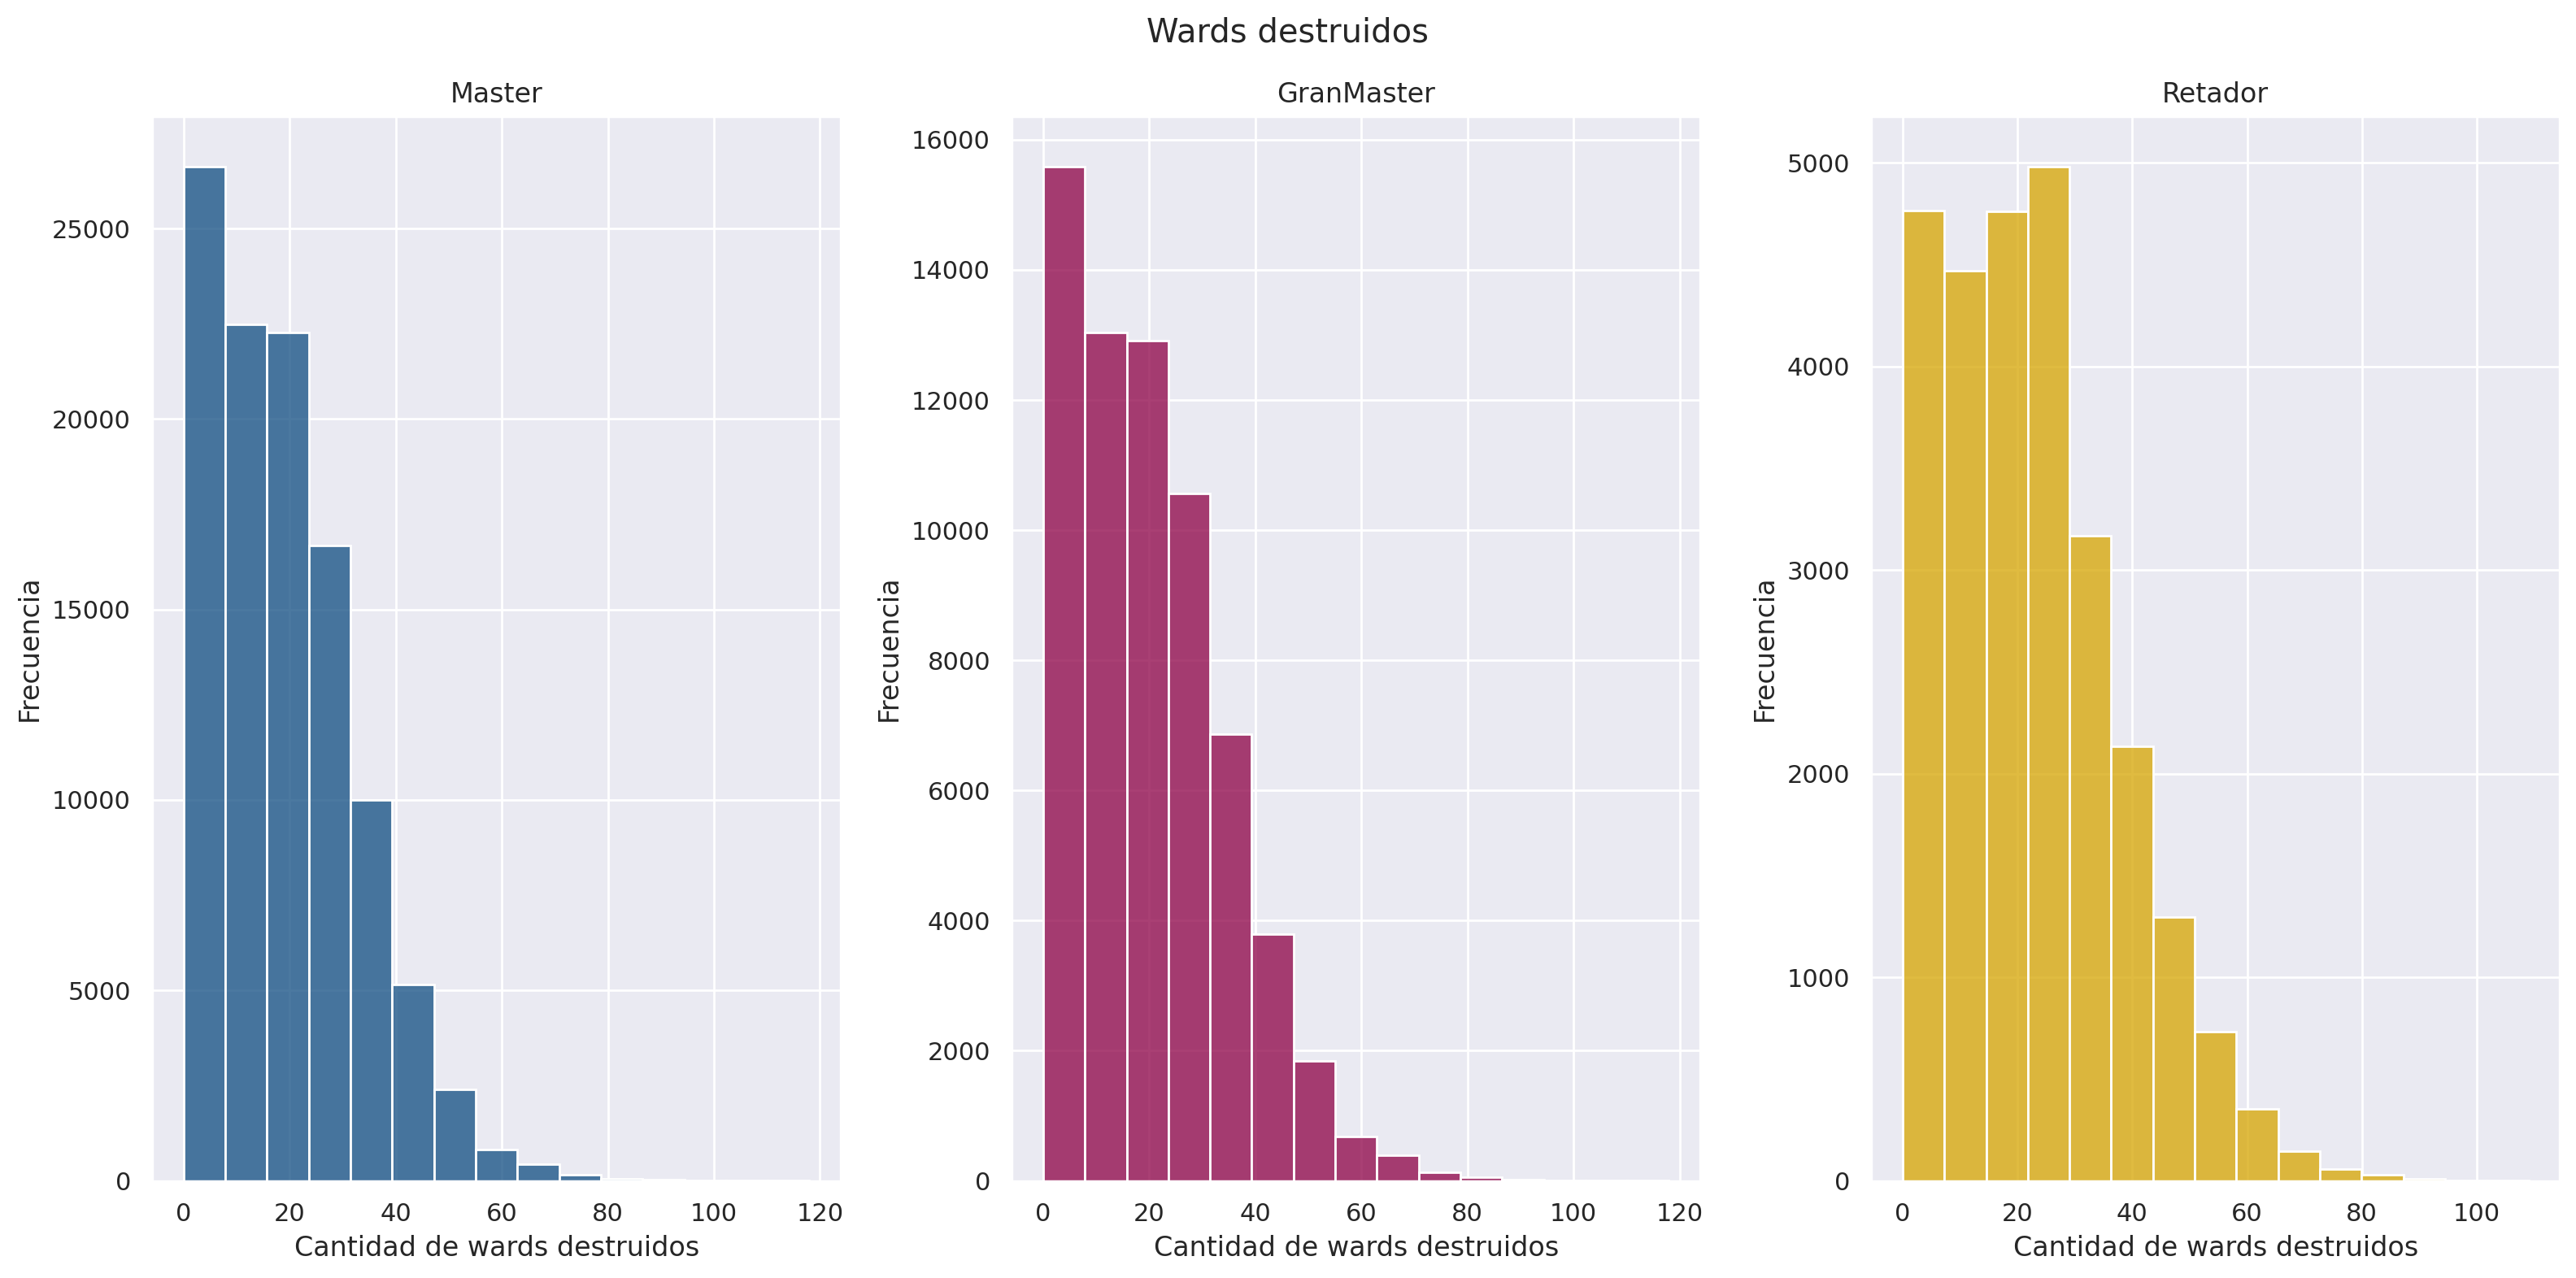

In [14]:
#Establecemos la figura
fig, ax = plt.subplots(ncols=3, figsize=(16,8), dpi=200)

#Grafico
sns.histplot(data=df_Master, x="blueWardkills", bins=15, ax=ax[0],  color="#0f4c81" )
sns.histplot(data=df_GranMaster, x="blueWardkills", bins=15, ax=ax[1])
sns.histplot(data=df_Retador, x="blueWardkills", bins=15, ax=ax[2], color="#d6a500")

#Subtitulo
plt.suptitle("Wards destruidos")

#Establecemos leyendas
ax[0].set_title("Master")
ax[0].set_xlabel("Cantidad de wards destruidos")
ax[0].set_ylabel("Frecuencia")


ax[1].set_title("GranMaster")
ax[1].set_xlabel("Cantidad de wards destruidos")
ax[1].set_ylabel("Frecuencia")

ax[2].set_title("Retador")
ax[2].set_xlabel("Cantidad de wards destruidos")
ax[2].set_ylabel("Frecuencia")

#Mostramos grafico
plt.tight_layout()

En general, entre bajo el rango, menos wards son colocados y destruidos.

##Correlaciones entre equipos

Veamos como es la correlación entre las variables respecto a los 3 rangos en el equipo azul.

In [15]:
#Separamos el equipo azul del conjunto de datos
blue_col = df.iloc[:, 2:26]
blue_last_col = df.iloc[:, -1:]
#Contenamos
df_blue = pd.concat([blue_col, blue_last_col], axis=1)

<ipython-input-16-e2da82e3dd0e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_blue.corr()["blueWins"].sort_values(ascending=False).drop("blueWins")


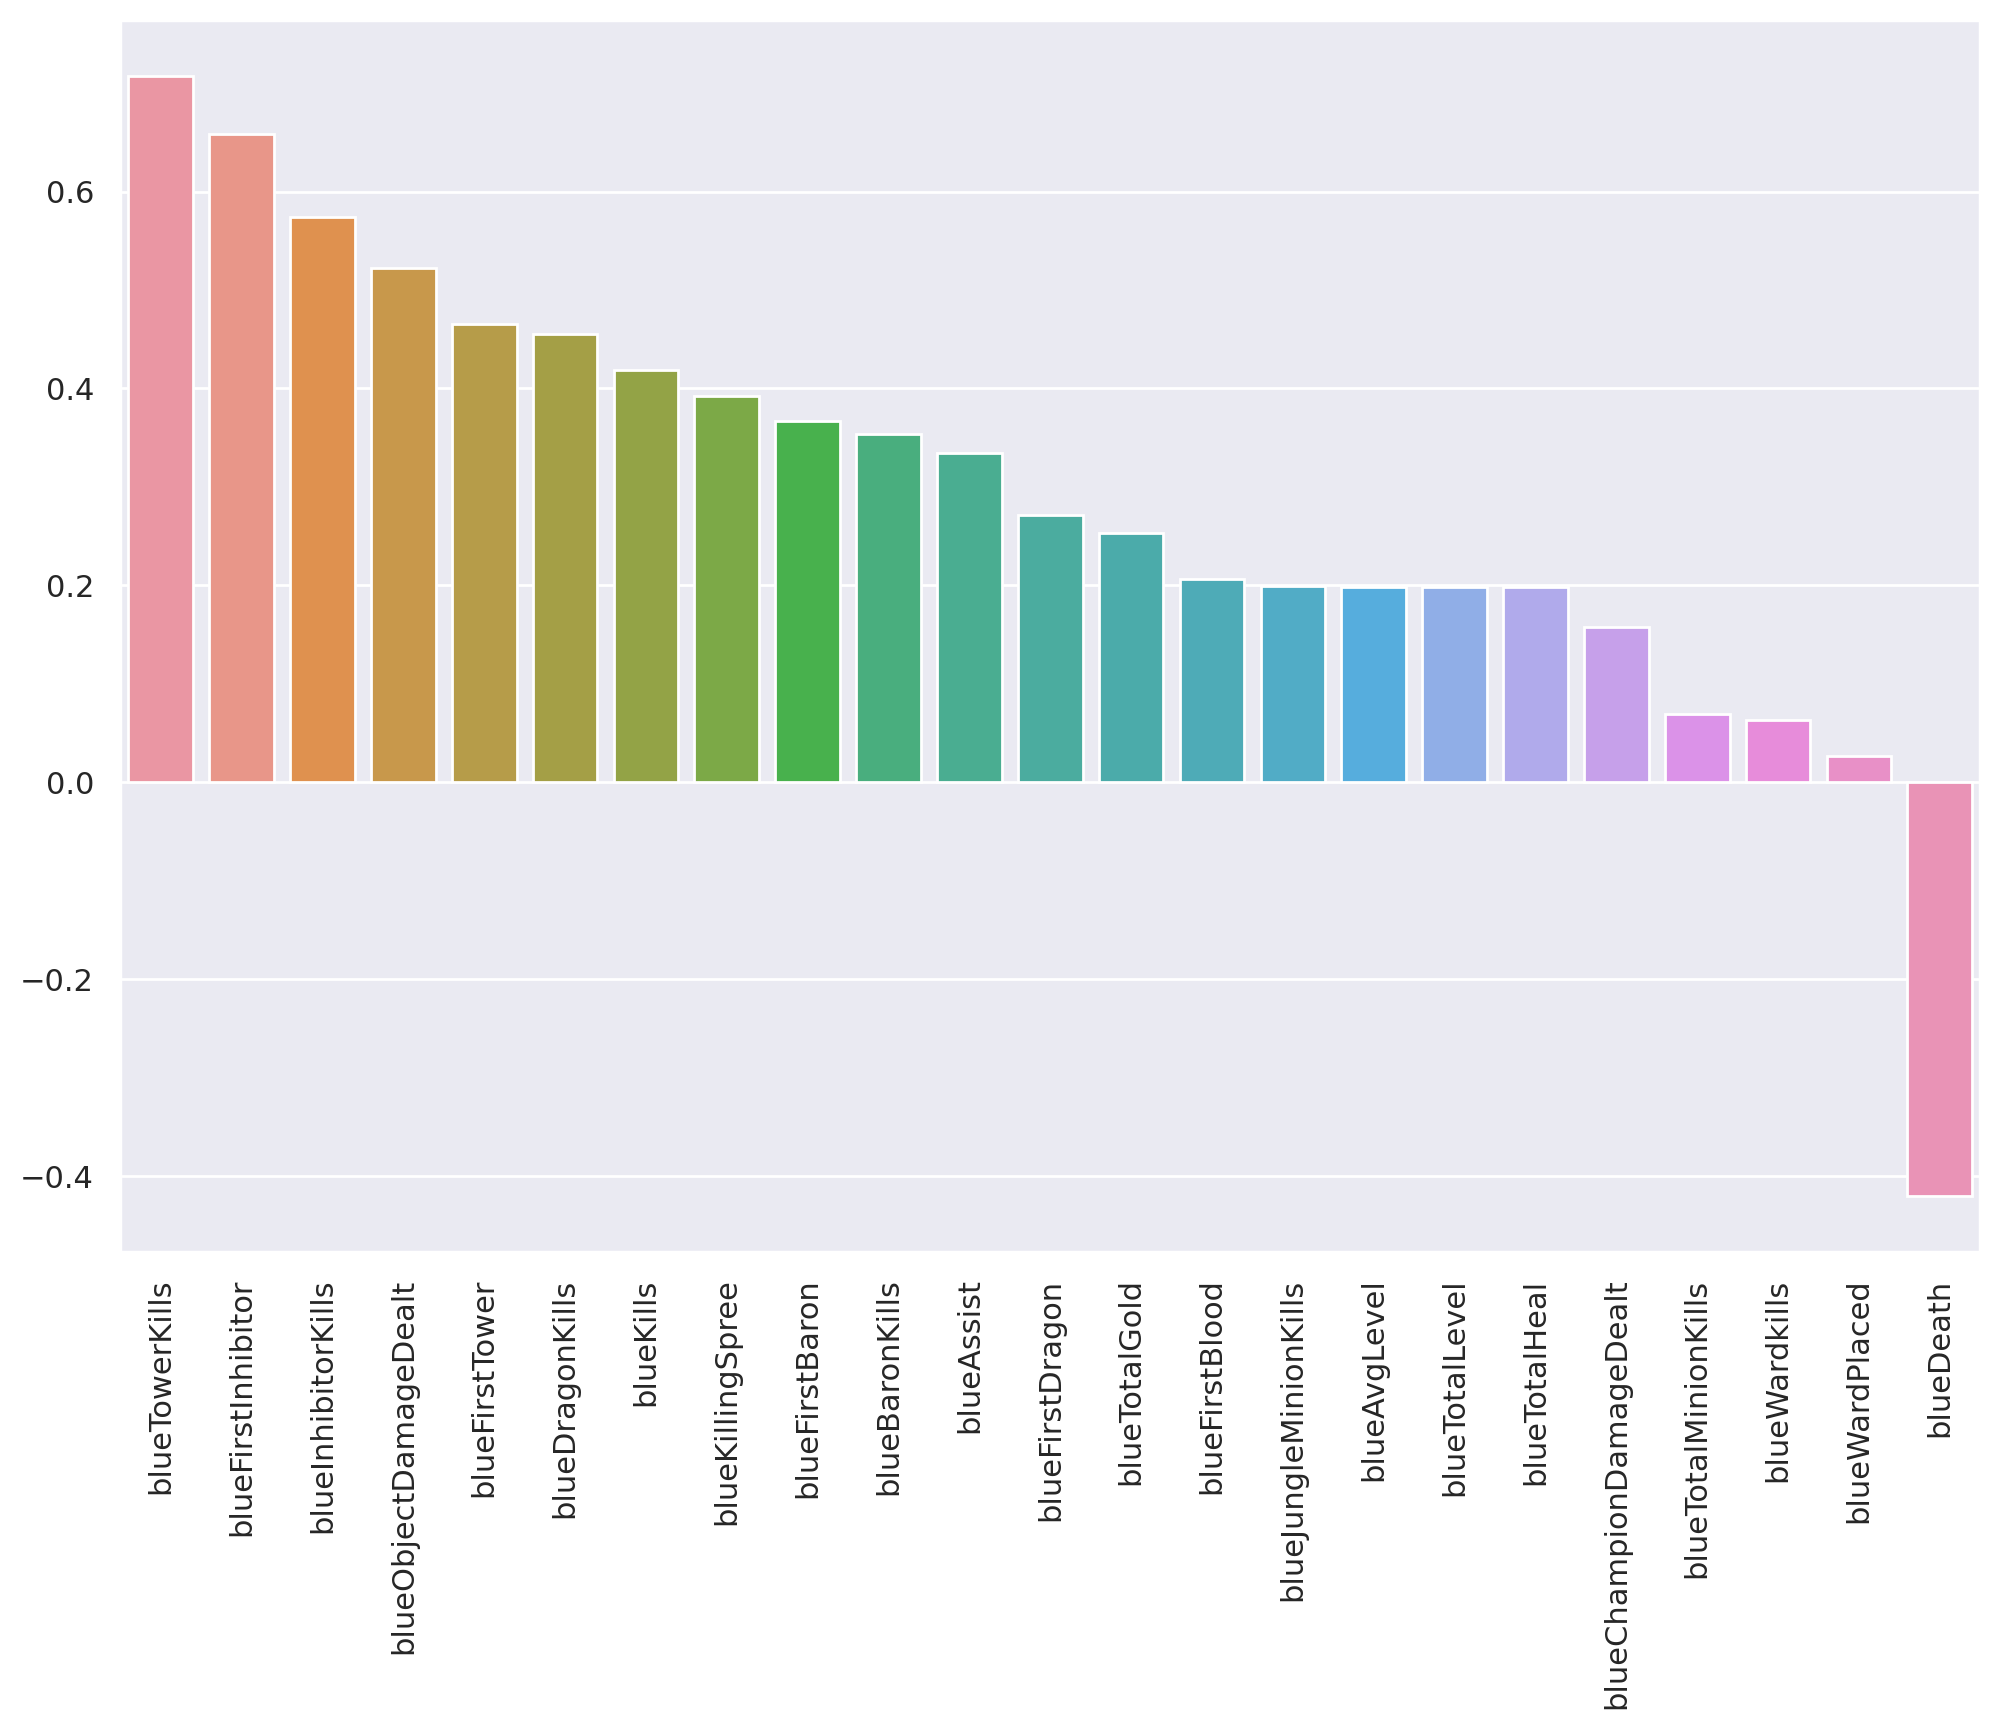

In [16]:
#Generamos una grafica de correlación
corr = df_blue.corr()["blueWins"].sort_values(ascending=False).drop("blueWins")
plt.figure(figsize=(12,8), dpi=200)
sns.barplot(x=corr.index, y=corr.values)
plt.xticks(rotation=90);

Entendiendo el contexto del juego es bastante interesante ver como las destrucción de las torres, los inibidores y los asesinatos son los 3 atributos que poseen mayor correlación respecto al atributo de "ganar", lo cual tiene sentido en el contexto del juego, ya que son necesarios para obtener las victorias.

##Correlaciones equipo rojo entre rangos

Tenemos ya la correlación de todos los rangos del equipo azul, pero ahora veamos la relación entre rangos del equipo rojo.

In [17]:
#Separamos el equipo rojo del conjuto de datos
df_red = df.iloc[:, 26:]
df_red

,redWins,redFirstBlood,redFirstTower,redFirstBaron,redFirstDragon,redFirstInhibitor,redDragonKills,redBaronKills,redTowerKills,redInhibitorKills,...,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt,rank,whoFirstBlood,Quien Gana
0,1,0,0,0,1,0,3,0,2,0,...,609,64,12.8,127,4,12916,26338,master,Azul,Rojo
1,1,1,0,0,1,0,2,0,1,0,...,510,63,12.6,133,4,12252,29828,master,Rojo,Rojo
2,0,1,1,0,0,0,2,0,3,0,...,630,65,13.0,153,2,17005,37066,master,Rojo,Azul
3,0,0,0,0,0,0,0,0,0,0,...,304,41,8.2,51,1,10499,3085,master,Azul,Azul
4,1,0,0,0,0,0,1,0,4,0,...,565,68,13.6,150,7,47523,47150,master,Azul,Rojo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26899,1,0,1,0,1,0,2,0,4,0,...,478,64,12.8,141,6,48596,42733,retador,Azul,Rojo
26900,1,0,0,0,0,1,0,0,10,2,...,455,72,14.4,136,11,15817,50217,retador,Azul,Rojo
26901,1,0,0,0,0,0,1,0,3,0,...,636,66,13.2,175,6,25448,27675,retador,Azul,Rojo
26902,0,0,1,1,0,0,2,1,4,0,...,660,70,14.0,168,5,25003,45455,retador,Azul,Azul


In [18]:
#Separamos entre rangos del equipo rojo
df_red_master = df_red[df_red["rank"] == "master"]
df_red_granmaster = df_red[df_red["rank"] == "granmaster"]
df_red_retador = df_red[df_red["rank"] == "retador"]

<ipython-input-19-307a42be879e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_red_master.corr()["redWins"].sort_values(ascending=False).drop("redWins")
<ipython-input-19-307a42be879e>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr1 = df_red_granmaster.corr()["redWins"].sort_values(ascending=False).drop("redWins")
<ipython-input-19-307a42be879e>:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr2 = df_red_retador.corr()["redWins"].sort_values(ascending=F

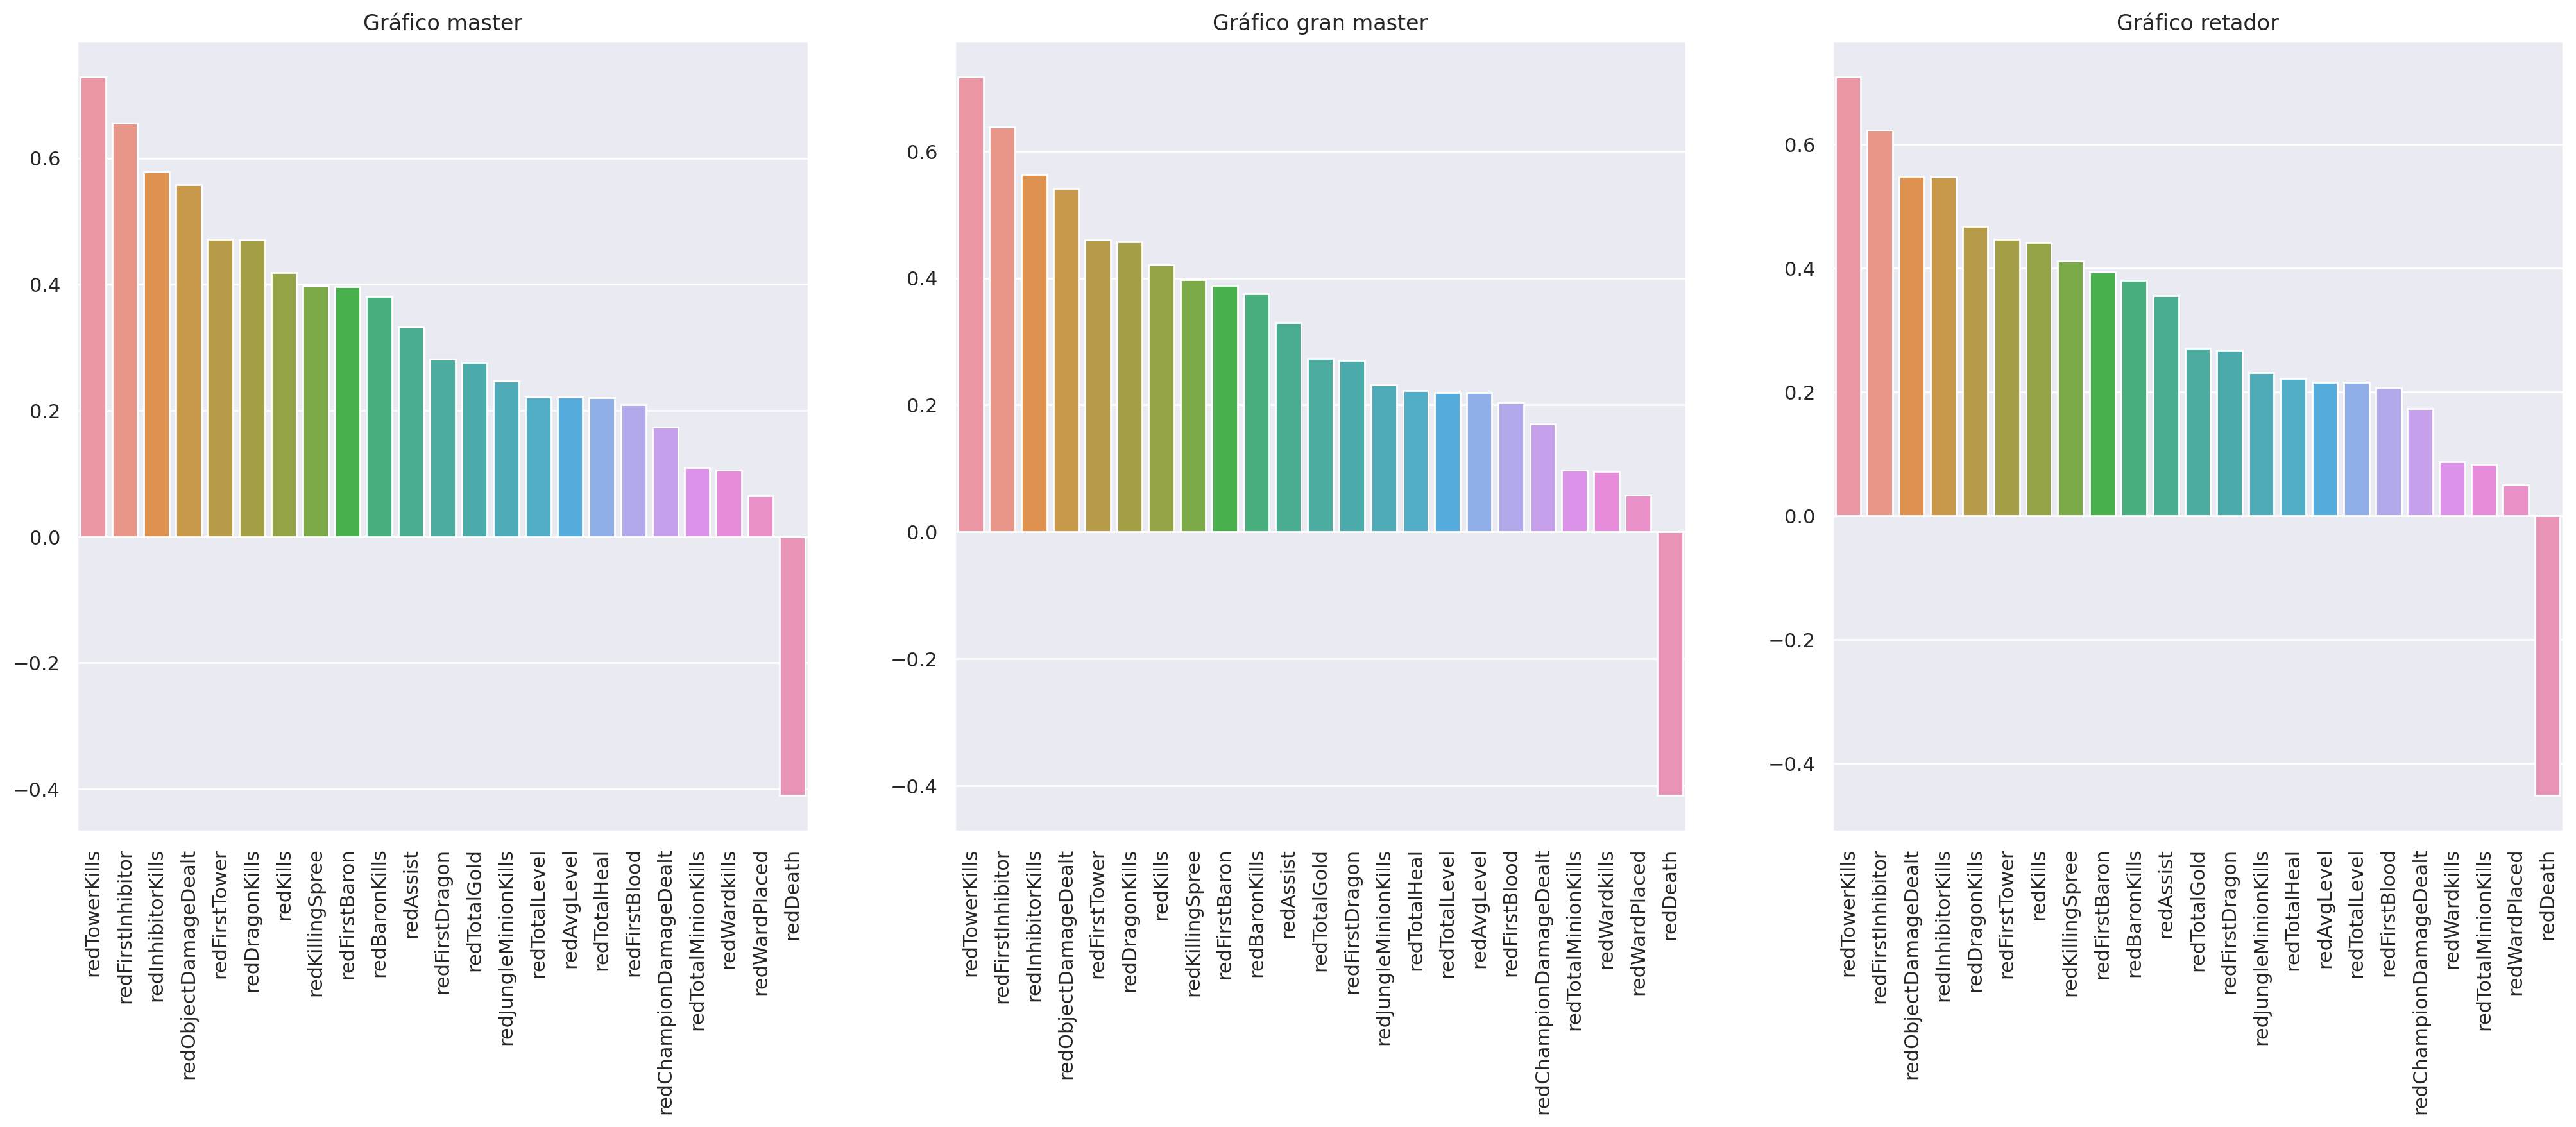

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(25, 8), dpi=200)

corr = df_red_master.corr()["redWins"].sort_values(ascending=False).drop("redWins")
sns.barplot(x=corr.index, y=corr.values, ax=axes[0])
axes[0].set_title('Gráfico master')
plt.sca(axes[0])
plt.xticks(rotation=90)

corr1 = df_red_granmaster.corr()["redWins"].sort_values(ascending=False).drop("redWins")
sns.barplot(x=corr1.index, y=corr1.values, ax=axes[1])
axes[1].set_title('Gráfico gran master')
plt.sca(axes[1])
plt.xticks(rotation=90)

corr2 = df_red_retador.corr()["redWins"].sort_values(ascending=False).drop("redWins")
sns.barplot(x=corr2.index, y=corr2.values, ax=axes[2])
axes[2].set_title('Gráfico retador')
plt.sca(axes[2])
plt.xticks(rotation=90)

plt.show()

Como conclusión de esta exploración de datos al hacer esta correlación podemos ver que los primeros 3 atributos no cambian, sin embargo, dependiendo del rango cambian estos valores de correlación, por lo cual se cumple nuestra premisa.

In [20]:
df.head()

,gameId,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,...,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt,rank,whoFirstBlood,Quien Gana
0,4227123625,1429,0,1,1,0,0,0,0,0,...,609,64,12.8,127,4,12916,26338,master,Azul,Rojo
1,4219545724,1313,0,0,1,0,0,0,0,0,...,510,63,12.6,133,4,12252,29828,master,Rojo,Rojo
2,4219463634,1660,1,0,0,1,1,1,1,1,...,630,65,13.0,153,2,17005,37066,master,Rojo,Azul
3,4205778093,984,1,1,1,0,1,0,2,0,...,304,41,8.2,51,1,10499,3085,master,Azul,Azul
4,4201063474,1437,0,1,1,0,1,0,2,0,...,565,68,13.6,150,7,47523,47150,master,Azul,Rojo


#5 - Selección de características


Debido a que tenemos 51 atributos, usaremos *information gain* para seleccionar los mejores atributos para generar nuestros modelos de clasificación.

In [21]:
#Eleminamos los datos creados.
df = df.drop(columns=["whoFirstBlood", "Quien Gana"])

Ya que tenemos cuales son nuestros mejores atributos, crearemos un DataFrame con los mejores 20 atributos.

In [22]:
#Importamos Information gain
from sklearn.feature_selection import mutual_info_classif

#Separamos las caracteristicas X y el atributo objetivo
X = df.drop("rank", axis=1)
y = df["rank"]

#Calculamos el information gain para cada atributo
information_gain = mutual_info_classif(X,y)

#Creamos un dataframe para visualizar el IG
information_gain_df = pd.DataFrame({'Feature': X.columns, 'Information Gain': information_gain})

# Muestra el DataFrame ordenado por Information Gain en orden descendente
information_gain_df = information_gain_df.sort_values(by='Information Gain', ascending=False)
print(information_gain_df)

# Selecciona las mejores 20 variables
mejores_variables = information_gain_df.head(20)

# Crea un nuevo DataFrame solo con las mejores variables
df_mejorado = df[mejores_variables['Feature']]

# Muestra el nuevo DataFrame
df_mejorado.head()

                    Feature  Information Gain
4            blueFirstTower          0.014056
27            redFirstBlood          0.013659
3            blueFirstBlood          0.013604
2                  blueWins          0.012753
26                  redWins          0.011756
28            redFirstTower          0.011620
30           redFirstDragon          0.011079
6           blueFirstDragon          0.008683
7        blueFirstInhibitor          0.007278
31        redFirstInhibitor          0.006365
29            redFirstBaron          0.005599
37             redWardkills          0.003946
44            redTotalLevel          0.003555
34            redTowerKills          0.003274
35        redInhibitorKills          0.003111
32           redDragonKills          0.002975
9            blueBaronKills          0.002865
13            blueWardkills          0.002658
36            redWardPlaced          0.002631
11       blueInhibitorKills          0.002567
8           blueDragonKills       

,blueFirstTower,redFirstBlood,blueFirstBlood,blueWins,redWins,redFirstTower,redFirstDragon,blueFirstDragon,blueFirstInhibitor,redFirstInhibitor,redFirstBaron,redWardkills,redTotalLevel,redTowerKills,redInhibitorKills,redDragonKills,blueBaronKills,blueWardkills,redWardPlaced,blueInhibitorKills
0,1,0,1,0,1,0,1,0,0,0,0,37,64,2,0,3,0,33,89,0
1,1,1,0,0,1,0,1,0,0,0,0,20,63,1,0,2,0,13,64,0
2,0,1,0,1,0,1,0,1,1,0,0,16,65,3,0,2,1,31,78,2
3,1,0,1,1,0,0,0,1,0,0,0,11,41,0,0,0,0,9,33,0
4,1,0,1,0,1,0,0,1,0,0,0,32,68,4,0,1,0,23,70,0


In [23]:
y1 = y

In [24]:
y = y1

#6 - Evaluación

In [25]:
resultados = {}

##C4.5

In [26]:
#importamos las librerias
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Divide los datos en características (X) y variable objetivo (y)
X = df_mejorado
#la variable (y) ya esta definida

X, _, y, _ = train_test_split(X, y, train_size=20000, random_state=42, stratify=y)


# Inicializa un árbol de decisión (C4.5) como clasificador
clf = DecisionTreeClassifier()

# Inicializa una validación cruzada estratificada con k=10
stratified_kfold = StratifiedKFold(n_splits=10)

# Listas para almacenar las métricas de cada pliegue
accuracies = []
precisions = []
recalls = []
confusion_matrices = []

for train_index, test_index in stratified_kfold.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Entrena el clasificador en el conjunto de entrenamiento
    clf.fit(X_train, y_train)

    # Realiza predicciones en el conjunto de prueba
    y_pred = clf.predict(X_test)

    # Calcula las métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')  # weighted precision for multiclass
    recall = recall_score(y_test, y_pred, average='weighted')  # weighted recall for multiclass

    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)

     # Calcula la matriz de confusión
    confusion = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(confusion)

# Calcula las métricas promedio
mean_accuracy = sum(accuracies) / len(accuracies)
mean_precision = sum(precisions) / len(precisions)
mean_recall = sum(recalls) / len(recalls)

print("Métricas promedio:")
print(f"Accuracy: {mean_accuracy}")
print(f"Precisión (weighted): {mean_precision}")
print(f"Sensibilidad (weighted recall): {mean_recall}")

Métricas promedio:
Accuracy: 0.4
Precisión (weighted): 0.40593338239458926
Sensibilidad (weighted recall): 0.4


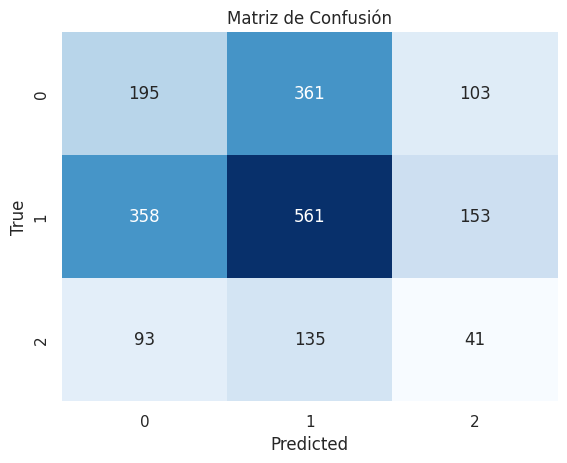

In [27]:
# Visualiza la matriz de confusión de un pliegue de ejemplo (puedes elegir cualquier pliegue)
example_confusion_matrix = confusion_matrices[0]  # Cambia el índice para elegir otro pliegue

# Utiliza seaborn para visualizar la matriz de confusión
sns.heatmap(example_confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Matriz de Confusión")
plt.show()

In [28]:
resultados["C4.5"] = {
    "Accuracy" : mean_accuracy,
    "Precision" : mean_precision,
    "Sensibilidad": mean_recall,
}
resultados
y = y1

## Naive Bayes

In [29]:
#Importamos librerias
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Divide los datos en características (X) y variable objetivo (y)
X = df_mejorado
#(y) ya esta defindo

X, _, y, _ = train_test_split(X, y, train_size=20000, random_state=42, stratify=y)


# Inicializa el clasificador Naive Bayes Multinomial
clf = MultinomialNB()

# Inicializa una validación cruzada estratificada con k=10
stratified_kfold = StratifiedKFold(n_splits=10)

# Listas para almacenar las métricas de cada pliegue
accuracies = []
precisions = []
recalls = []
confusion_matrices = []


for train_index, test_index in stratified_kfold.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Entrena el clasificador en el conjunto de entrenamiento
    clf.fit(X_train, y_train)

    # Realiza predicciones en el conjunto de prueba
    y_pred = clf.predict(X_test)

    # Calcula las métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')  # weighted precision for multiclass
    recall = recall_score(y_test, y_pred, average='weighted')  # weighted recall for multiclass

    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)

     # Calcula la matriz de confusión
    confusion = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(confusion)

# Calcula las métricas promedio
mean_accuracy = sum(accuracies) / len(accuracies)
mean_precision = sum(precisions) / len(precisions)
mean_recall = sum(recalls) / len(recalls)

print("Métricas promedio:")
print(f"Accuracy: {mean_accuracy}")
print(f"Precisión (weighted): {mean_precision}")
print(f"Sensibilidad (weighted recall): {mean_recall}")

Métricas promedio:
Accuracy: 0.45115
Precisión (weighted): 0.42863520456781756
Sensibilidad (weighted recall): 0.45115


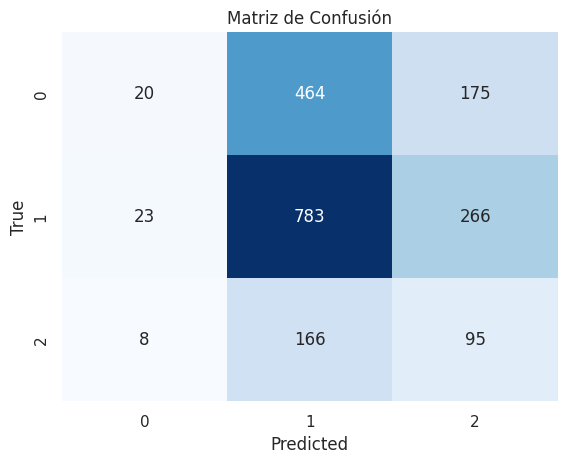

In [30]:
# Visualiza la matriz de confusión de un pliegue de ejemplo (puedes elegir cualquier pliegue)
example_confusion_matrix = confusion_matrices[0]  # Cambia el índice para elegir otro pliegue

# Utiliza seaborn para visualizar la matriz de confusión
sns.heatmap(example_confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Matriz de Confusión")
plt.show()

In [31]:
resultados["Naive Bayes"] = {
    "Accuracy" : mean_accuracy,
    "Precision" : mean_precision,
    "Sensibilidad": mean_recall,
}
resultados
y = y1

##K-NN

In [32]:
#Importamos librerias
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

#Division
X = df_mejorado
#(y) ya esta definido

# Reduce el conjunto de datos a 20,000 instancias manteniendo la distribución original
X, _, y, _ = train_test_split(X, y, train_size=20000, random_state=42, stratify=y)


# Inicializa el clasificador KNN
clf = KNeighborsClassifier(n_neighbors=3)

# Inicializa una validación cruzada estratificada con k=10
stratified_kfold = StratifiedKFold(n_splits=10)

# Listas para almacenar las métricas de cada pliegue
accuracies = []
precisions = []
recalls = []
confusion_matrices = []

for train_index, test_index in stratified_kfold.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Entrena el clasificador en el conjunto de entrenamiento
    clf.fit(X_train, y_train)

    # Realiza predicciones en el conjunto de prueba
    y_pred = clf.predict(X_test)

    # Calcula las métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')  # weighted precision for multiclass
    recall = recall_score(y_test, y_pred, average='weighted')  # weighted recall for multiclass

    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)

    # Calcula la matriz de confusión
    confusion = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(confusion)

# Calcula las métricas promedio
mean_accuracy = sum(accuracies) / len(accuracies)
mean_precision = sum(precisions) / len(precisions)
mean_recall = sum(recalls) / len(recalls)

print("Métricas promedio:")
print(f"Accuracy: {mean_accuracy}")
print(f"Precisión (weighted): {mean_precision}")
print(f"Sensibilidad (weighted recall): {mean_recall}")

Métricas promedio:
Accuracy: 0.43485000000000007
Precisión (weighted): 0.42121782724302437
Sensibilidad (weighted recall): 0.43485000000000007


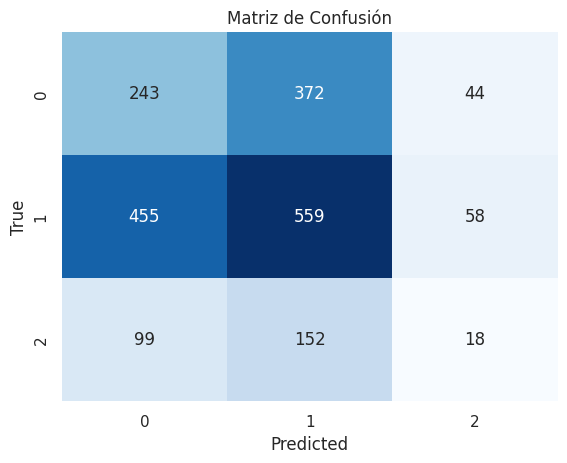

In [33]:
# Visualiza la matriz de confusión de un pliegue de ejemplo (puedes elegir cualquier pliegue)
example_confusion_matrix = confusion_matrices[0]  # Cambia el índice para elegir otro pliegue

# Utiliza seaborn para visualizar la matriz de confusión
sns.heatmap(example_confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Matriz de Confusión")
plt.show()

In [34]:
resultados["Knn"] = {
    "Accuracy" : mean_accuracy,
    "Precision" : mean_precision,
    "Sensibilidad": mean_recall,
}
resultados
y = y1

##SVM

In [35]:
#Importamos librerias
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

X = df_mejorado

# Reduce el conjunto de datos a 20,000 instancias manteniendo la distribución original
X, _, y, _ = train_test_split(X, y, train_size=2000, random_state=42, stratify=y)


# Inicializa el clasificador SVM
clf = SVC(kernel='linear')

# Inicializa una validación cruzada estratificada con k=10
stratified_kfold = StratifiedKFold(n_splits=10)

# Listas para almacenar las métricas de cada pliegue
accuracies = []
precisions = []
recalls = []
confusion_matrices = []

for train_index, test_index in stratified_kfold.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Entrena el clasificador en el conjunto de entrenamiento
    clf.fit(X_train, y_train)

    # Realiza predicciones en el conjunto de prueba
    y_pred = clf.predict(X_test)

    # Calcula las métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')  # weighted precision for multiclass
    recall = recall_score(y_test, y_pred, average='weighted')  # weighted recall for multiclass

    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)

       # Calcula la matriz de confusión
    confusion = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(confusion)


# Calcula las métricas promedio
mean_accuracy = sum(accuracies) / len(accuracies)
mean_precision = sum(precisions) / len(precisions)
mean_recall = sum(recalls) / len(recalls)

print("Métricas promedio:")
print(f"Accuracy: {mean_accuracy}")
print(f"Precisión (weighted): {mean_precision}")
print(f"Sensibilidad (weighted recall): {mean_recall}")

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

Métricas promedio:
Accuracy: 0.5360000000000001
Precisión (weighted): 0.2873
Sensibilidad (weighted recall): 0.5360000000000001


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


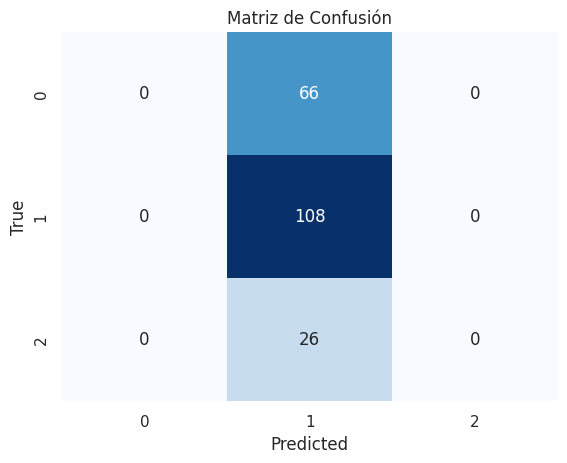

In [36]:
# Visualiza la matriz de confusión de un pliegue de ejemplo (puedes elegir cualquier pliegue)
example_confusion_matrix = confusion_matrices[0]  # Cambia el índice para elegir otro pliegue

# Utiliza seaborn para visualizar la matriz de confusión
sns.heatmap(example_confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Matriz de Confusión")
plt.show()

In [37]:
resultados["SVM"] = {
    "Accuracy" : mean_accuracy,
    "Precision" : mean_precision,
    "Sensibilidad": mean_recall,
}
resultados
y = y1

## Stochastic Gradient Descent

In [38]:
#Importamos librerias
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

X = df_mejorado

# Reduce el conjunto de datos a 20,000 instancias manteniendo la distribución original
X, _, y, _ = train_test_split(X, y, train_size=20000, random_state=42, stratify=y)

# Inicializa el clasificador SGD
clf = SGDClassifier(loss='hinge', max_iter=1000, random_state=42)  # Ajusta los parámetros según tus necesidades

# Inicializa una validación cruzada estratificada con k=10
stratified_kfold = StratifiedKFold(n_splits=10)

# Listas para almacenar las métricas de cada pliegue
accuracies = []
precisions = []
recalls = []
confusion_matrices = []

for train_index, test_index in stratified_kfold.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Entrena el clasificador en el conjunto de entrenamiento
    clf.fit(X_train, y_train)

    # Realiza predicciones en el conjunto de prueba
    y_pred = clf.predict(X_test)

    # Calcula las métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')  # weighted precision for multiclass
    recall = recall_score(y_test, y_pred, average='weighted')  # weighted recall for multiclass

    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)

     # Calcula la matriz de confusión
    confusion = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(confusion)

# Calcula las métricas promedio
mean_accuracy = sum(accuracies) / len(accuracies)
mean_precision = sum(precisions) / len(precisions)
mean_recall = sum(recalls) / len(recalls)

print("Métricas promedio:")
print(f"Accuracy: {mean_accuracy}")
print(f"Precisión (weighted): {mean_precision}")
print(f"Sensibilidad (weighted recall): {mean_recall}")

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

Métricas promedio:
Accuracy: 0.43624999999999997
Precisión (weighted): 0.4309977692437367
Sensibilidad (weighted recall): 0.43624999999999997


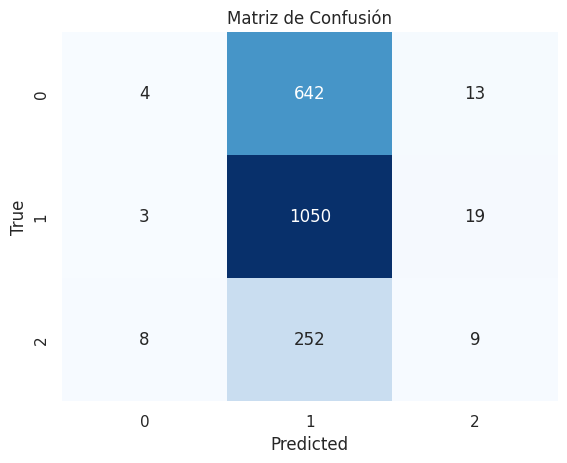

In [39]:
# Visualiza la matriz de confusión de un pliegue de ejemplo (puedes elegir cualquier pliegue)
example_confusion_matrix = confusion_matrices[0]  # Cambia el índice para elegir otro pliegue

# Utiliza seaborn para visualizar la matriz de confusión
sns.heatmap(example_confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Matriz de Confusión")
plt.show()

In [40]:
resultados["SGD"] = {
    "Accuracy" : mean_accuracy,
    "Precision" : mean_precision,
    "Sensibilidad": mean_recall,
}
resultados
y = y1

## Nearest Centroid Classifier

In [41]:
#Importamos librerias
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.neighbors import NearestCentroid
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

X = df_mejorado

# Reduce el conjunto de datos a 20,000 instancias manteniendo la distribución original
X, _, y, _ = train_test_split(X, y, train_size=20000, random_state=42, stratify=y)

# Inicializa el clasificador Nearest Centroid
clf = NearestCentroid()

# Inicializa una validación cruzada estratificada con k=10
stratified_kfold = StratifiedKFold(n_splits=10)

# Listas para almacenar las métricas de cada pliegue
accuracies = []
precisions = []
recalls = []
confusion_matrices = []


for train_index, test_index in stratified_kfold.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Entrena el clasificador en el conjunto de entrenamiento
    clf.fit(X_train, y_train)

    # Realiza predicciones en el conjunto de prueba
    y_pred = clf.predict(X_test)

    # Calcula las métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')  # weighted precision for multiclass
    recall = recall_score(y_test, y_pred, average='weighted')  # weighted recall for multiclass

    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)

    # Calcula la matriz de confusión
    confusion = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(confusion)

# Calcula las métricas promedio
mean_accuracy = sum(accuracies) / len(accuracies)
mean_precision = sum(precisions) / len(precisions)
mean_recall = sum(recalls) / len(recalls)

print("Métricas promedio:")
print(f"Accuracy: {mean_accuracy}")
print(f"Precisión (weighted): {mean_precision}")
print(f"Sensibilidad (weighted recall): {mean_recall}")

Métricas promedio:
Accuracy: 0.36354999999999993
Precisión (weighted): 0.42361392799904785
Sensibilidad (weighted recall): 0.36354999999999993


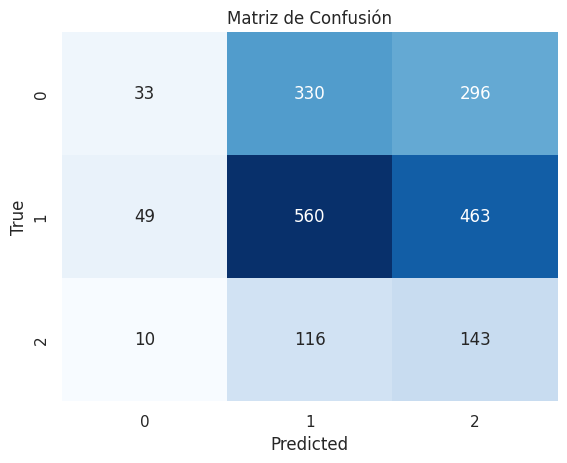

In [42]:
# Visualiza la matriz de confusión de un pliegue de ejemplo (puedes elegir cualquier pliegue)
example_confusion_matrix = confusion_matrices[0]  # Cambia el índice para elegir otro pliegue

# Utiliza seaborn para visualizar la matriz de confusión
sns.heatmap(example_confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Matriz de Confusión")
plt.show()

In [43]:
resultados["NCC"] = {
    "Accuracy" : mean_accuracy,
    "Precision" : mean_precision,
    "Sensibilidad": mean_recall,
}
y = y1

##Gaussian Naive Bayes

In [44]:
#Importamos librerias
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

X = df_mejorado

# Reduce el conjunto de datos a 20,000 instancias manteniendo la distribución original
X, _, y, _ = train_test_split(X, y, train_size=20000, random_state=42, stratify=y)

# Inicializa el clasificador Gaussian Process Classification
clf = GaussianNB()

# Inicializa una validación cruzada estratificada con k=10
stratified_kfold = StratifiedKFold(n_splits=10)

# Listas para almacenar las métricas de cada pliegue
accuracies = []
precisions = []
recalls = []
confusion_matrices = []

for train_index, test_index in stratified_kfold.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Entrena el clasificador en el conjunto de entrenamiento
    clf.fit(X_train, y_train)

    # Realiza predicciones en el conjunto de prueba
    y_pred = clf.predict(X_test)

    # Calcula las métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')  # weighted precision for multiclass
    recall = recall_score(y_test, y_pred, average='weighted')  # weighted recall for multiclass

    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)

    # Calcula la matriz de confusión
    confusion = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(confusion)

# Calcula las métricas promedio
mean_accuracy = sum(accuracies) / len(accuracies)
mean_precision = sum(precisions) / len(precisions)
mean_recall = sum(recalls) / len(recalls)

print("Métricas promedio:")
print(f"Accuracy: {mean_accuracy}")
print(f"Precisión (weighted): {mean_precision}")
print(f"Sensibilidad (weighted recall): {mean_recall}")

Métricas promedio:
Accuracy: 0.5239999999999998
Precisión (weighted): 0.43696853369349525
Sensibilidad (weighted recall): 0.5239999999999998


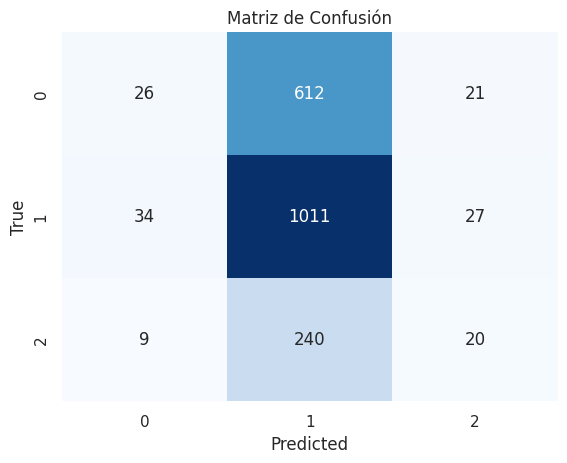

In [45]:
# Visualiza la matriz de confusión de un pliegue de ejemplo (puedes elegir cualquier pliegue)
example_confusion_matrix = confusion_matrices[0]  # Cambia el índice para elegir otro pliegue

# Utiliza seaborn para visualizar la matriz de confusión
sns.heatmap(example_confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Matriz de Confusión")
plt.show()

In [46]:
resultados["GNB"] = {
    "Accuracy" : mean_accuracy,
    "Precision" : mean_precision,
    "Sensibilidad": mean_recall,
}
y = y1

## Bernoulli Naive Bayes

In [47]:
#Importamos librerias
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

X = df_mejorado

# Reduce el conjunto de datos a 20,000 instancias manteniendo la distribución original
X, _, y, _ = train_test_split(X, y, train_size=20000, random_state=42, stratify=y)

# Inicializa el clasificador Gaussian Naive Bayes
clf = GaussianNB()

# Inicializa una validación cruzada estratificada con k=10
stratified_kfold = StratifiedKFold(n_splits=10)

# Listas para almacenar las métricas de cada pliegue
accuracies = []
precisions = []
recalls = []
confusion_matrices = []

for train_index, test_index in stratified_kfold.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Entrena el clasificador en el conjunto de entrenamiento
    clf.fit(X_train, y_train)

    # Realiza predicciones en el conjunto de prueba
    y_pred = clf.predict(X_test)

    # Calcula las métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')  # weighted precision for multiclass
    recall = recall_score(y_test, y_pred, average='weighted')  # weighted recall for multiclass

    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)

     # Calcula la matriz de confusión
    confusion = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(confusion)

# Calcula las métricas promedio
mean_accuracy = sum(accuracies) / len(accuracies)
mean_precision = sum(precisions) / len(precisions)
mean_recall = sum(recalls) / len(recalls)

print("Métricas promedio:")
print(f"Accuracy: {mean_accuracy}")
print(f"Precisión (weighted): {mean_precision}")
print(f"Sensibilidad (weighted recall): {mean_recall}")

Métricas promedio:
Accuracy: 0.5239999999999998
Precisión (weighted): 0.43696853369349525
Sensibilidad (weighted recall): 0.5239999999999998


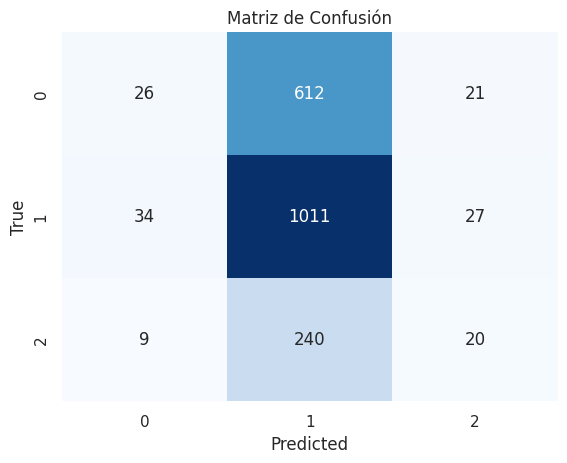

In [48]:
# Visualiza la matriz de confusión de un pliegue de ejemplo (puedes elegir cualquier pliegue)
example_confusion_matrix = confusion_matrices[0]  # Cambia el índice para elegir otro pliegue

# Utiliza seaborn para visualizar la matriz de confusión
sns.heatmap(example_confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Matriz de Confusión")
plt.show()

In [49]:
resultados["BNB"] = {
    "Accuracy" : mean_accuracy,
    "Precision" : mean_precision,
    "Sensibilidad": mean_recall,
}
y = y1

##Random Forest

In [50]:
#Importamos librerias
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

X = df_mejorado

# Reduce el conjunto de datos a 20,000 instancias manteniendo la distribución original
X, _, y, _ = train_test_split(X, y, train_size=20000, random_state=42, stratify=y)
# Inicializa el clasificador Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)  # Ajusta los parámetros según tus necesidades

# Inicializa una validación cruzada estratificada con k=10
stratified_kfold = StratifiedKFold(n_splits=10)

# Listas para almacenar las métricas de cada pliegue
accuracies = []
precisions = []
recalls = []
confusion_matrices = []

for train_index, test_index in stratified_kfold.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Entrena el clasificador en el conjunto de entrenamiento
    clf.fit(X_train, y_train)

    # Realiza predicciones en el conjunto de prueba
    y_pred = clf.predict(X_test)

    # Calcula las métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')  # weighted precision for multiclass
    recall = recall_score(y_test, y_pred, average='weighted')  # weighted recall for multiclass

    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)

    # Calcula la matriz de confusión
    confusion = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(confusion)

# Calcula las métricas promedio
mean_accuracy = sum(accuracies) / len(accuracies)
mean_precision = sum(precisions) / len(precisions)
mean_recall = sum(recalls) / len(recalls)

print("Métricas promedio:")
print(f"Accuracy: {mean_accuracy}")
print(f"Precisión (weighted): {mean_precision}")
print(f"Sensibilidad (weighted recall): {mean_recall}")


Métricas promedio:
Accuracy: 0.48114999999999986
Precisión (weighted): 0.4102536175372564
Sensibilidad (weighted recall): 0.48114999999999986


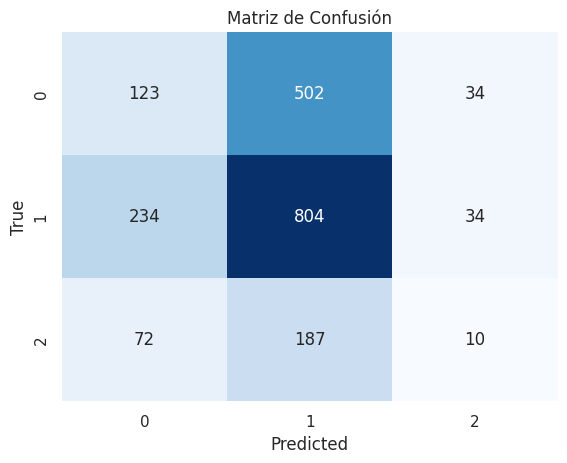

In [51]:
# Visualiza la matriz de confusión de un pliegue de ejemplo (puedes elegir cualquier pliegue)
example_confusion_matrix = confusion_matrices[0]  # Cambia el índice para elegir otro pliegue

# Utiliza seaborn para visualizar la matriz de confusión
sns.heatmap(example_confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Matriz de Confusión")
plt.show()

In [52]:
resultados["RF"] = {
    "Accuracy" : mean_accuracy,
    "Precision" : mean_precision,
    "Sensibilidad": mean_recall,
}
y = y1

##Logistic Regression

In [53]:
#importamos las librerias
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
# Divide los datos en características (X) y variable objetivo (y)
X = df_mejorado
#la variable (y) ya esta definida
X, _, y, _ = train_test_split(X, y, train_size=20000, random_state=42, stratify=y)


# Inicializa una validación cruzada estratificada con k=10
stratified_kfold = StratifiedKFold(n_splits=10)

# Listas para almacenar las métricas de cada pliegue
accuracies = []
precisions = []
recalls = []
confusion_matrices = []

for train_index, test_index in stratified_kfold.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Inicializa el clasificador de regresión logística (OvR)
    clf = LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=1000)  # Ajusta los parámetros según tus necesidades

    # Entrena el clasificador en el conjunto de entrenamiento
    clf.fit(X_train, y_train)

    # Realiza predicciones en el conjunto de prueba
    y_pred = clf.predict(X_test)

    # Calcula las métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')  # weighted precision for multiclass
    recall = recall_score(y_test, y_pred, average='weighted')  # weighted recall for multiclass

    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)

     # Calcula la matriz de confusión
    confusion = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(confusion)

# Calcula las métricas promedio
mean_accuracy = sum(accuracies) / len(accuracies)
mean_precision = sum(precisions) / len(precisions)
mean_recall = sum(recalls) / len(recalls)

print("Métricas promedio:")
print(f"Accuracy: {mean_accuracy}")
print(f"Precisión (weighted): {mean_precision}")
print(f"Sensibilidad (weighted recall): {mean_recall}")

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Us

Métricas promedio:
Accuracy: 0.5343500000000001
Precisión (weighted): 0.4093653248433299
Sensibilidad (weighted recall): 0.5343500000000001


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


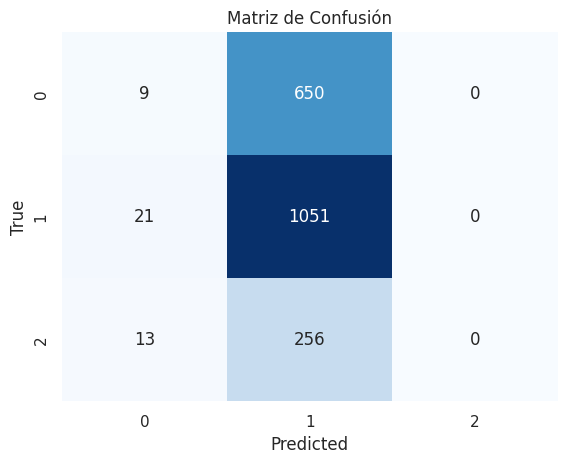

In [54]:
# Visualiza la matriz de confusión de un pliegue de ejemplo (puedes elegir cualquier pliegue)
example_confusion_matrix = confusion_matrices[0]  # Cambia el índice para elegir otro pliegue

# Utiliza seaborn para visualizar la matriz de confusión
sns.heatmap(example_confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Matriz de Confusión")
plt.show()

In [55]:
resultados["LR"] = {
    "Accuracy" : mean_accuracy,
    "Precision" : mean_precision,
    "Sensibilidad": mean_recall,
}
y = y1

#Rendimiento

In [56]:
rendimiento = pd.DataFrame(resultados)
rendimiento = rendimiento.T
rendimiento.sort_values(by="Accuracy", ascending=False)

,Accuracy,Precision,Sensibilidad
SVM,0.53600,0.287300,0.53600
LR,0.53435,0.409365,0.53435
GNB,0.52400,0.436969,0.52400
BNB,0.52400,0.436969,0.52400
RF,0.48115,0.410254,0.48115
Naive Bayes,0.45115,0.428635,0.45115
SGD,0.43625,0.430998,0.43625
Knn,0.43485,0.421218,0.43485
C4.5,0.40000,0.405933,0.40000
NCC,0.36355,0.423614,0.36355


Considerando los 3 atributos de evaluación, considero que Logisit Regression tiene un mejor rendimiento respecto a los otros.

Apliquemos un PCA y usemos LR de nuevo para ver su rendimiento, si es que mejora o no.

In [57]:
#importamos las librerias
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.decomposition import PCA
# Divide los datos en características (X) y variable objetivo (y)
X = df_mejorado
#la variable (y) ya esta definida

# Número de componentes principales (ajusta según tus necesidades)
n_components = 4

# Inicializa una validación cruzada estratificada con k=10
stratified_kfold = StratifiedKFold(n_splits=10)

# Listas para almacenar las métricas de cada pliegue
accuracies = []
precisions = []
recalls = []
confusion_matrices = []

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

clf = LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=1000)

clf.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = clf.predict(X_test)

# Calcula las métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # weighted precision for multiclass
recall = recall_score(y_test, y_pred, average='weighted')  # weighted recall for multiclass

accuracies.append(accuracy)
precisions.append(precision)
recalls.append(recall)

  # Calcula la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)
confusion_matrices.append(confusion)

# Calcula las métricas promedio
mean_accuracy = sum(accuracies) / len(accuracies)
mean_precision = sum(precisions) / len(precisions)
mean_recall = sum(recalls) / len(recalls)

print("Métricas promedio:")
print(f"Accuracy: {mean_accuracy}")
print(f"Precisión (weighted): {mean_precision}")
print(f"Sensibilidad (weighted recall): {mean_recall}")

Métricas promedio:
Accuracy: 0.5353007377766662
Precisión (weighted): 0.5321873615111611
Sensibilidad (weighted recall): 0.5353007377766662


In [58]:
resultados["LR/PCA"] = {
    "Accuracy" : mean_accuracy,
    "Precision" : mean_precision,
    "Sensibilidad": mean_recall,
}
y = y1

In [59]:
rendimiento = pd.DataFrame(resultados)
rendimiento = rendimiento.T
rendimiento.sort_values(by="Accuracy", ascending=False)

,Accuracy,Precision,Sensibilidad
SVM,0.536000,0.287300,0.536000
LR/PCA,0.535301,0.532187,0.535301
LR,0.534350,0.409365,0.534350
GNB,0.524000,0.436969,0.524000
BNB,0.524000,0.436969,0.524000
RF,0.481150,0.410254,0.481150
Naive Bayes,0.451150,0.428635,0.451150
SGD,0.436250,0.430998,0.436250
Knn,0.434850,0.421218,0.434850
C4.5,0.400000,0.405933,0.400000


#Conclusión

Lo que podemos observar desde la clasificación es que los valores entre las clases no son tan diferentes ya que son los rangos más altos del juego poseen estadisticas similares.

Al mismo tiempo es importante recordar que tenemos 3 clases, por lo que usar una "moneda" seria tener un "33.33%" de exactitud, por lo que el modelo es mejor que el "aleatorio" no por mucho pero sin duda es una buen herramienta que podria ayudar para identificar el rango de la partida solo con los datos.

Al aplicar un PCA aumentó su precisión en un 10% pero su exactitud quedo casí igual, lo cual nos dice que mejoró el modelo a la hora de hacer predicciones correctas entre verdaderos positivos y verdaderos negativos, por lo cual se puede considerar como una mejora y un modelo con mayor veracidad.